In [1]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(dplyr))
load("environment/brain_sim_nodtu/mode=gc_bias/mapDf.RData")

load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInfNS.RData")

load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCons.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggConsNS.RData")

load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCons0.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggConsNS0.RData")

load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeCor.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggCorNS.RData")

load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeThr.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggThrNS.RData")

load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC0.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInfNS0.RData")

load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/treeMC.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/yAggMeanInfNS.RData")

### Plotting mean infRV

In [2]:
#### Thr
depth <- node.depth(treeThr,2)
table(depth)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- data.frame(infRV = mcols(yAggThrNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Cons_Thr")

depth
     1      2      3      4      5      6      7      8      9     10     11 
139299   9933   3811   1691    711    332    150     62     26     15     10 
    12     13     14     15     16     17     18     19     20     21     22 
     7      5      3      2      2      1      1      1      1      1      1 

In [3]:
### Consensus
depth <- node.depth(treeCons,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggConsNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus"))

In [4]:
### Mean Inf
depth <- node.depth(treeMeanInf,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggMeanInfNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="MeanInf"))

In [5]:
### Correlation
depth <- node.depth(treeCor,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggCorNS)[["meanInfRV"]], depth = depth, modDep = modDep, type="Anti-Correlation"))

In [6]:
### Mean Inf 0 threshold
depth <- node.depth(treeMeanInf0,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggMeanInfNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="MeanInf0"))

In [7]:
### Consensus 0 threshold
depth <- node.depth(treeCons0,2)
modDep <- depth
modDep[modDep > 6] = 7
dfInfRV <- rbind(dfInfRV, data.frame(infRV = mcols(yAggConsNS0)[["meanInfRV"]], depth = depth, modDep = modDep, type="Consensus0"))

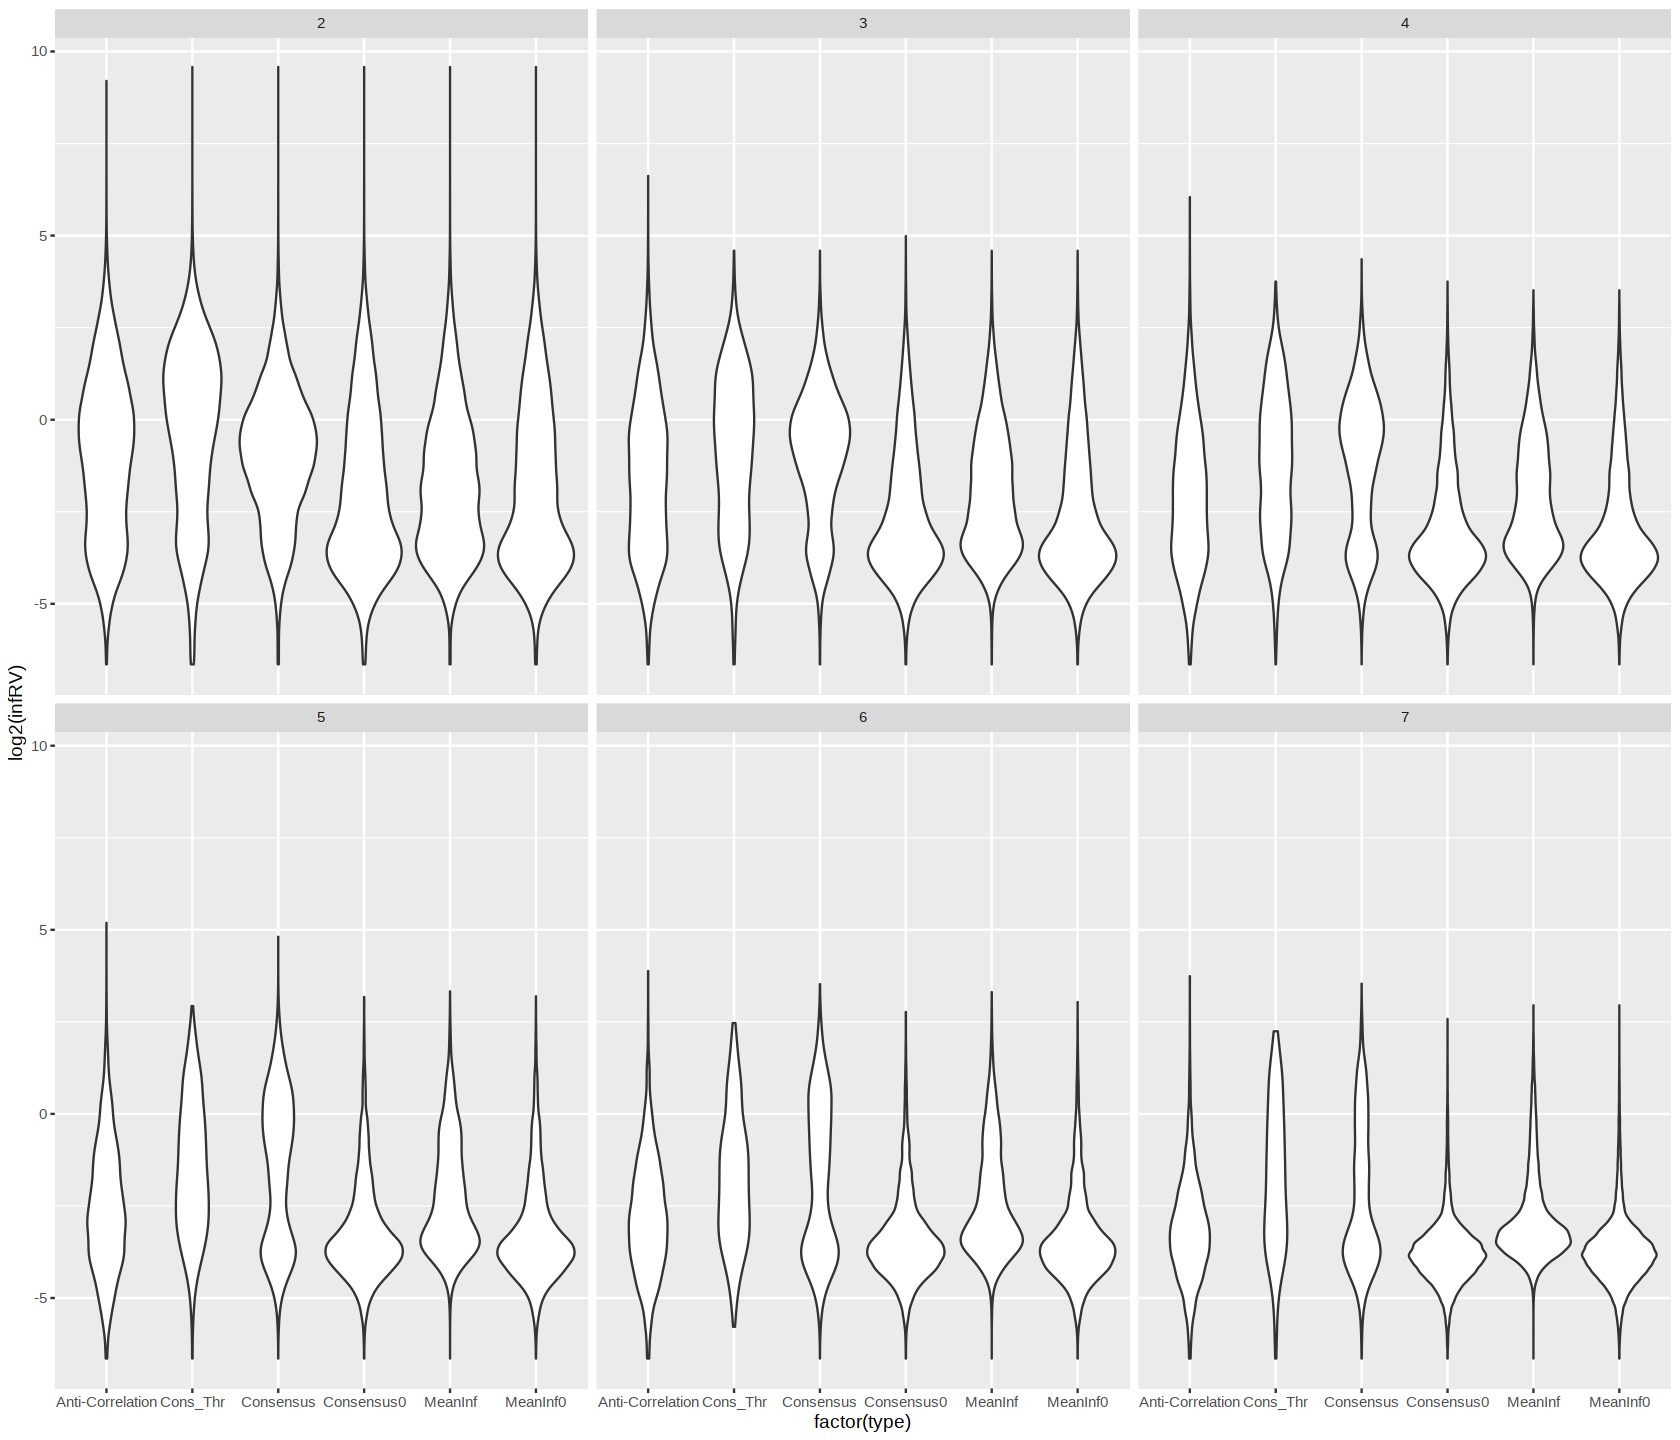

In [8]:
options(repr.plot.width=14, repr.plot.height=12)
dfInfRV %>% filter(depth!=1) %>% ggplot(aes(x=factor(type), y=log2(infRV))) + geom_violin() + facet_wrap(vars(modDep))

In [9]:
f <- function(m, p=0.2) {
    mean(m < p)
}
# dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep) %>% summarise(m = f(infRV,0.2))
reshape::cast(dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep, value="infRV", fun.aggregate = f)
reshape::cast(dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep), type~modDep,
              value="infRV", fun.aggregate = median)
# dfInfRV %>% filter(depth!=1) %>% group_by(type,modDep) %>% summarise(median(infRV))

,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,0.3038168,0.3913704,0.4853254,0.5819657,0.6417526,0.7592500
2,Cons_Thr,0.2364844,0.2820782,0.3329391,0.3699015,0.4246988,0.4409722
3,Consensus,0.2253145,0.2426178,0.3169432,0.3929517,0.4710030,0.5759944
4,Consensus0,0.5092667,0.6343017,0.7290168,0.8011315,0.8500056,0.9440161
5,MeanInf,0.4263961,0.4760780,0.5192603,0.5639065,0.6145759,0.7747894
6,MeanInf0,0.4907835,0.6414847,0.7308007,0.7932892,0.8405077,0.9330707


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,0.5373988,0.3285520,0.21035844,0.15219817,0.13165201,0.10349151
2,Cons_Thr,0.9682355,0.5907024,0.42069476,0.31545594,0.26074854,0.26970609
3,Consensus,0.5460351,0.5773698,0.52650472,0.40026363,0.24995059,0.13138328
4,Consensus0,0.1908355,0.1216140,0.09753178,0.08679287,0.08200614,0.07053485
5,MeanInf,0.2650574,0.2197991,0.18680315,0.15932443,0.13888357,0.10888740
6,MeanInf0,0.2100909,0.1157327,0.09506434,0.08539325,0.08152465,0.07127540


In [39]:
### Consensus Thr
innNodes <- length(treeThr$tip)+1:treeThr$Nnode
childNodes <- Descendants(treeThr, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggThrNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggThrNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- data.frame(red = c(rep(1000,length(treeThr$tip)), redInfRV), type="Cons_Thr")                
save(dfRedInf, file = "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfRedInf.RData")

In [38]:
### Consensus
innNodes <- length(treeCons$tip)+1:treeCons$Nnode
childNodes <- Descendants(treeCons, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCons$tip)), redInfRV), type="Consensus"))
save(dfRedInf, file = "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfRedInf.RData")

In [42]:
### Consensus0
innNodes <- length(treeCons0$tip)+1:treeCons0$Nnode
childNodes <- Descendants(treeCons0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggConsNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggConsNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCons0$tip)), redInfRV), type="Consensus0"))
save(dfRedInf, file = "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfRedInf.RData")

In [ ]:
### Mean Inf
innNodes <- length(treeMC$tip)+1:treeMC$Nnode
childNodes <- Descendants(treeMC, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggMeanInfNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeMC$tip)), redInfRV), type="MeanInf"))
save(dfRedInf, file = "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfRedInf.RData")

In [ ]:
### Correlation
innNodes <- length(treeCor$tip)+1:treeCor$Nnode
childNodes <- Descendants(treeCor, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggCorNS)[innNodes[i], "meanInfRV"] - mean(mcols(yAggCorNS)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeCor$tip)), redInfRV), type="Anti-Correlation"))
save(dfRedInf, file = "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfRedInf.RData")

In [ ]:
### Mean Inf 0Thr
innNodes <- length(treeMC0$tip)+1:treeMC0$Nnode
childNodes <- Descendants(treeMC0, innNodes, "child")
redInfRV <- sapply(seq_along(innNodes), function(i) mcols(yAggMeanInfNS0)[innNodes[i], "meanInfRV"] - mean(mcols(yAggMeanInfNS0)[childNodes[[i]], "meanInfRV"]))
dfRedInf <- rbind(dfRedInf, data.frame(red = c(rep(1000,length(treeMC0$tip)), redInfRV), type="MeanInf0"))
save(dfRedInf, file = "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfRedInf.RData")

In [21]:
dfInfRV$redInfRV <- 1000
l <- length(treeThr$tip)
labs <- c("Cons_Thr", "Consensus", "MeanInf", "Anti-Correlation", "MeanInf0", "Consensus0")
trees <- list(treeThr, treeCons, treeMeanInf, treeCor, treeMeanInf0, treeCons0)
sI <- l
for(i in seq_along(trees)) {
    inds <- sI+1:trees[[i]]$Nnode
    dfD <- dfRedInf %>% filter(type==labs[i], red!=1000) %>% select(red) %>% unlist
    dfInfRV$redInfRV[inds] <- dfD
    sI <- inds[length(inds)]+l
}

In [63]:
# sum(dfRedInf$type != dfInfRV$type)
# dfInfRV <- cbind(dfInfRV, redInfRV=dfRedInf$red)

Warning message in dfRedInf$type != dfInfRV$type:
"longer object length is not a multiple of shorter object length"


[1] 118474

In [43]:
save(dfInfRV, file = "environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfInfRV.RData")

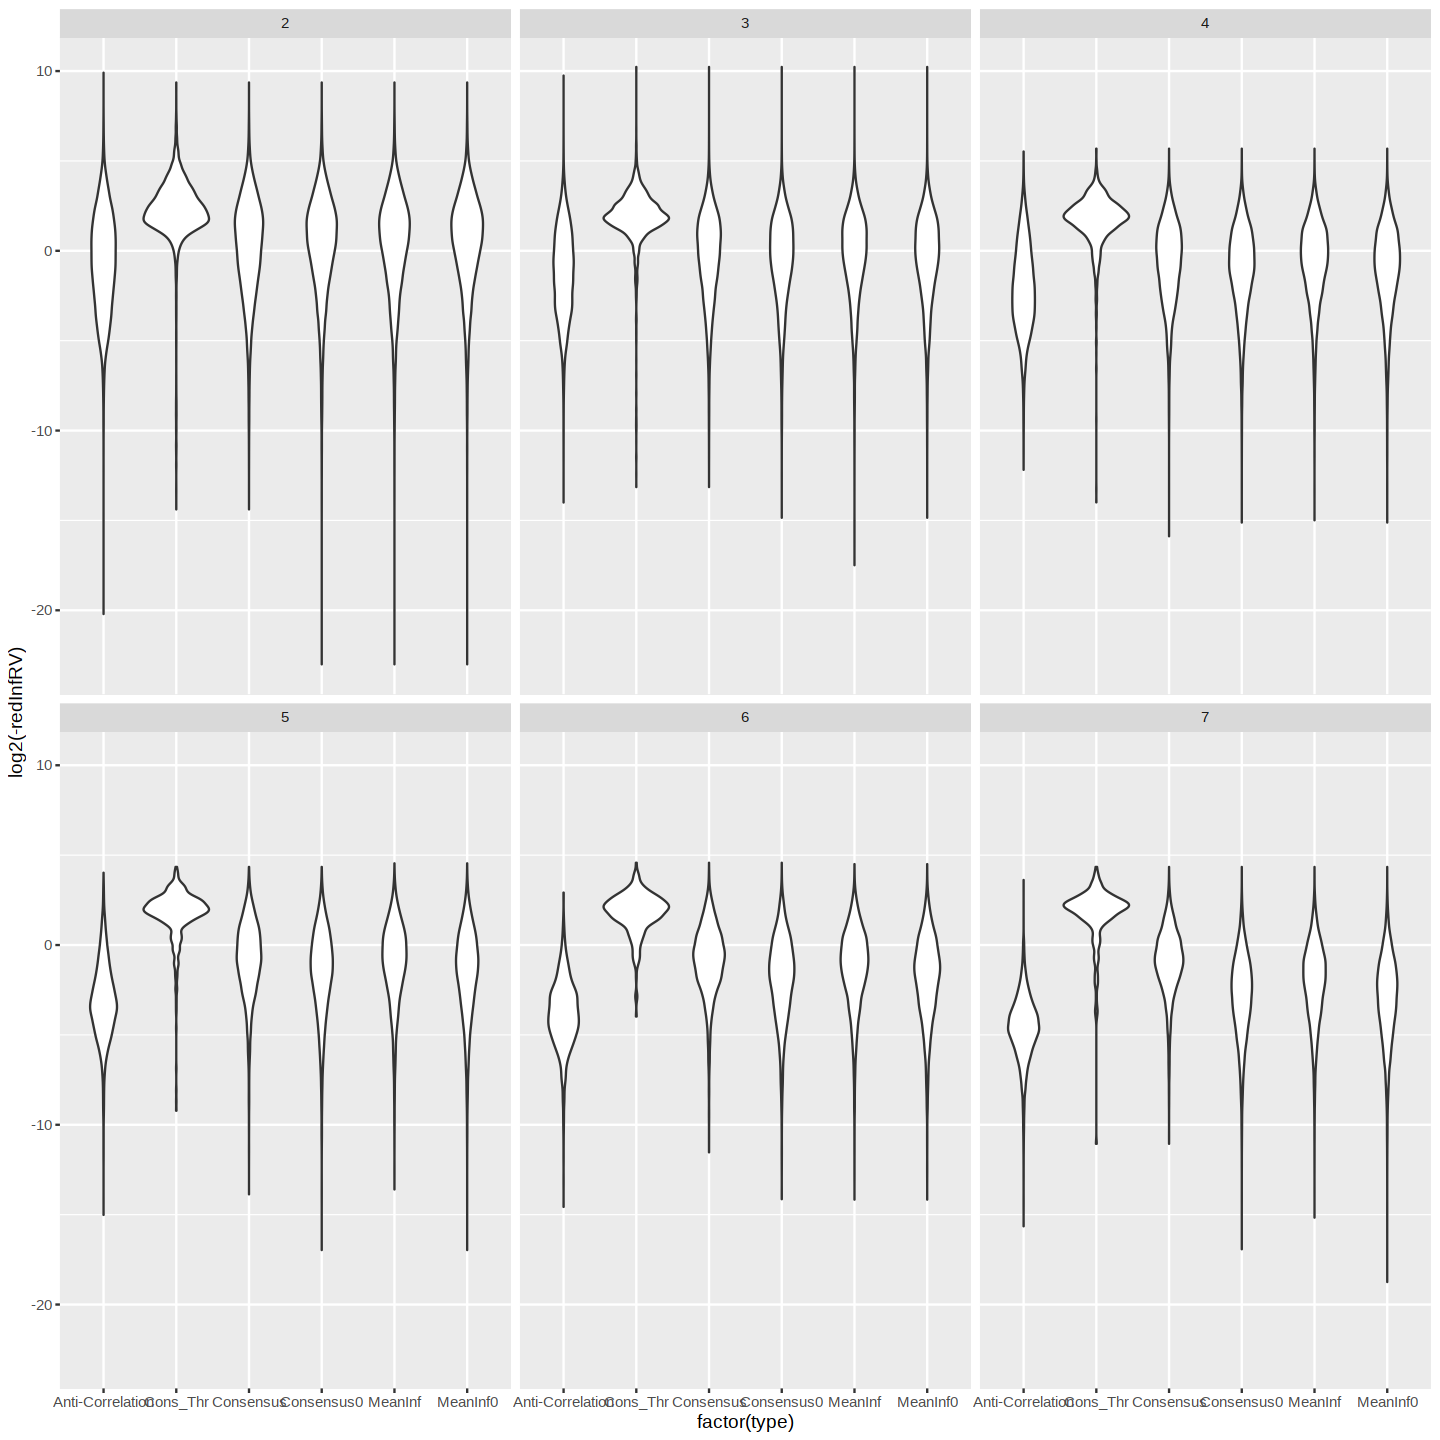

In [29]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% ggplot(aes(x=factor(type), y=log2(-redInfRV))) + geom_violin() + facet_wrap(vars(modDep))

In [30]:
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, length)
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, median, value="redInfRV")
reshape::cast(dfInfRV %>% filter(depth!=1, redInfRV < 0) %>% group_by(type,modDep), type~modDep, min, value="redInfRV")

Using redInfRV as value column.  Use the value argument to cast to override this choice



,type,2,3,4,5,6,7
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,Anti-Correlation,27089,14687,8225,4674,2621,3251
2,Cons_Thr,9143,3666,1630,683,319,271
3,Consensus,19251,11596,8137,5702,3969,6736
4,Consensus0,19361,13954,11405,9564,7901,37708
5,MeanInf,18749,12493,9261,7057,5413,21865
6,MeanInf0,18389,13620,11296,9584,7995,43301


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-0.6948583,-0.4620160,-0.2232195,-0.1077460,-0.07027255,-0.04249141
2,Cons_Thr,-4.6962831,-3.8376385,-3.6845707,-3.9178994,-4.00215938,-4.20006755
3,Consensus,-1.3907146,-0.9512040,-0.7181980,-0.6315341,-0.61309088,-0.56649852
4,Consensus0,-1.5178399,-0.8512812,-0.5687886,-0.4068330,-0.32167746,-0.15473614
5,MeanInf,-1.5890376,-0.9914898,-0.7432287,-0.5897264,-0.48681765,-0.26585914
6,MeanInf0,-1.6839130,-0.8921936,-0.5812016,-0.4132745,-0.32719252,-0.14491278


,type,2,3,4,5,6,7
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Anti-Correlation,-960.9102,-860.6451,-46.01828,-16.24310,-7.548011,-12.28300
2,Cons_Thr,-659.3857,-1200.2813,-51.36865,-20.32009,-23.880455,-20.31359
3,Consensus,-659.3857,-1200.2813,-51.36865,-20.32009,-23.880455,-20.31359
4,Consensus0,-659.3857,-1200.2813,-51.36865,-20.32009,-23.880455,-20.31359
5,MeanInf,-659.3857,-1200.2813,-51.36865,-23.33190,-22.646112,-20.31359
6,MeanInf0,-659.3857,-1200.2813,-51.36865,-23.33190,-22.646112,-20.31359


### Genes

In [19]:
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/updated/comp_trees/genesCor.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/updated/comp_trees/genesL.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/genesMeanInf.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/genesMeanInf0.RData")
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/genesCons0.RData")

In [32]:
dfNGenes <- data.frame(matrix(nrow=0, ncol=3))
colnames(dfNGenes) <- c("Type", "nGenes", "modDep")
dfNGenes <- rbind(dfNGenes, data.frame(Type="Consensus", nGenes = sapply(genesL[2:length(genesL)], length), 
                                       depth = node.depth(treeCons,2)[length(treeCons$tip)+2:treeCons$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Consensus0", nGenes = sapply(genesCons0[2:length(genesCons0)], length), 
                                       depth = node.depth(treeCons0,2)[length(treeCons0$tip)+2:treeCons0$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="Anti-Correlation", nGenes = sapply(genesCor[2:length(genesCor)], length), 
                                       depth = node.depth(treeCor,2)[length(treeCor$tip)+2:treeCor$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="MeanInf", nGenes = sapply(genesMeanInf[2:length(genesMeanInf)], length), 
                                       depth = node.depth(treeMeanInf,2)[length(treeMeanInf$tip)+2:treeMeanInf$Nnode]))
dfNGenes <- rbind(dfNGenes, data.frame(Type="MeanInf0", nGenes = sapply(genesMeanInf0[2:length(genesMeanInf0)], length), 
                                       depth = node.depth(treeMeanInf0,2)[length(treeMeanInf0$tip)+2:treeMeanInf0$Nnode]))

dfNGenes[dfNGenes$depth > 6,"depth"]=7

In [33]:
table(dfNGenes$Type)


Anti-Correlation        Consensus       Consensus0          MeanInf 
           72360            91956           116421            99968 
        MeanInf0 
          120440 

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 686


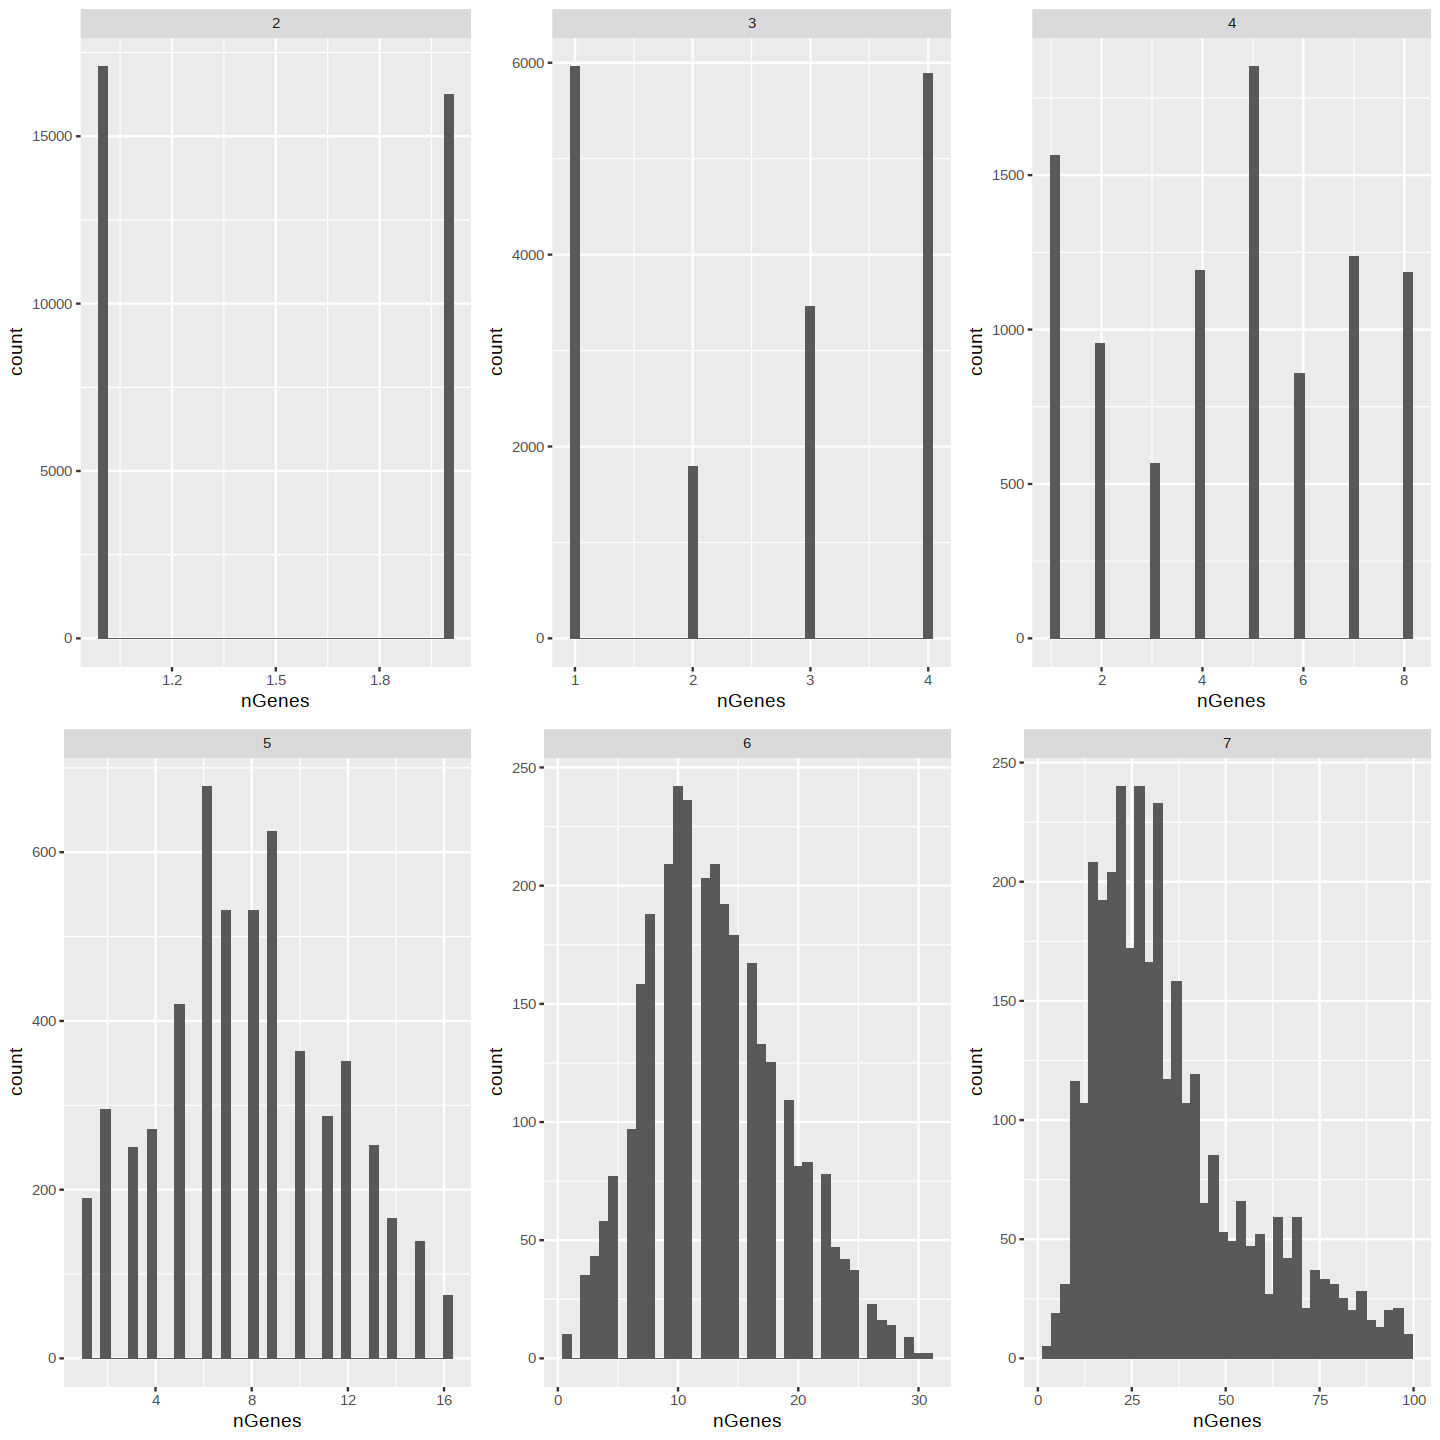

In [34]:
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Anti-Correlation" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


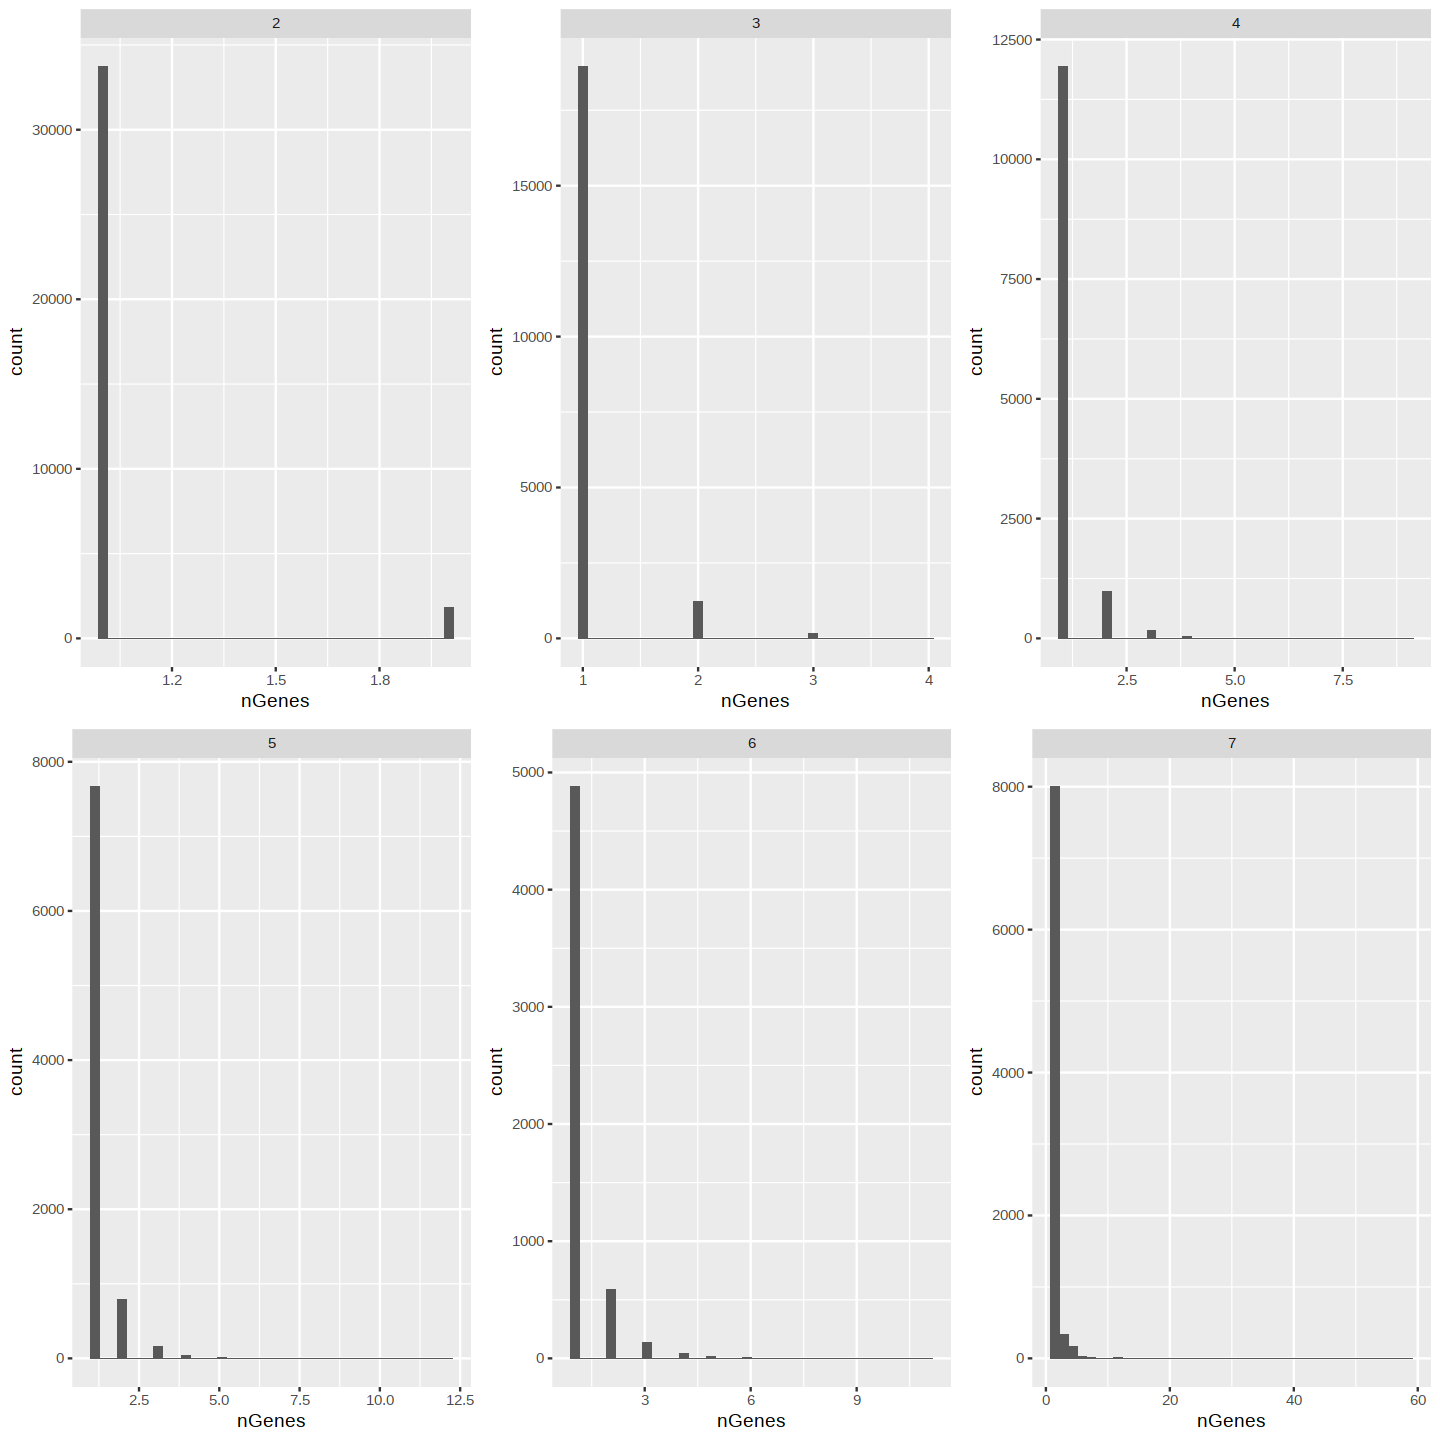

In [28]:
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


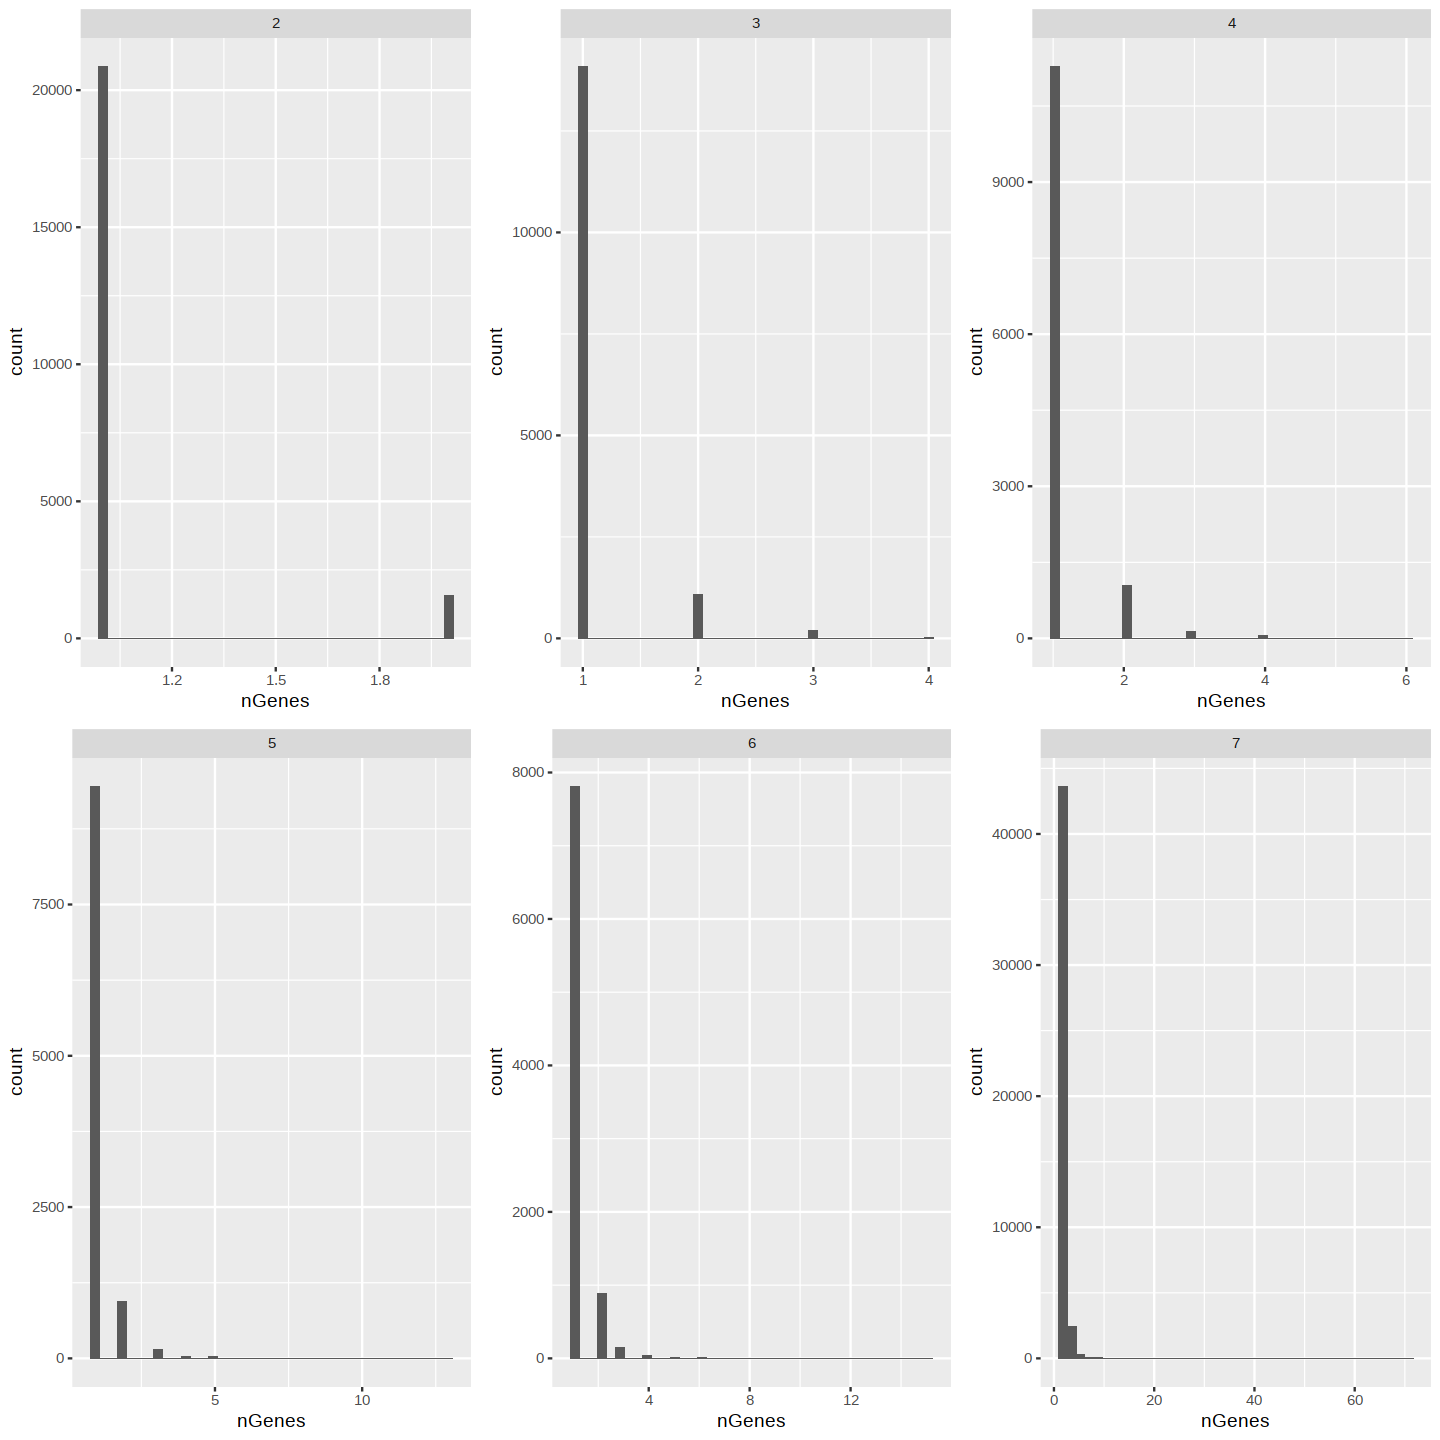

In [35]:
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "Consensus0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "Consensus0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


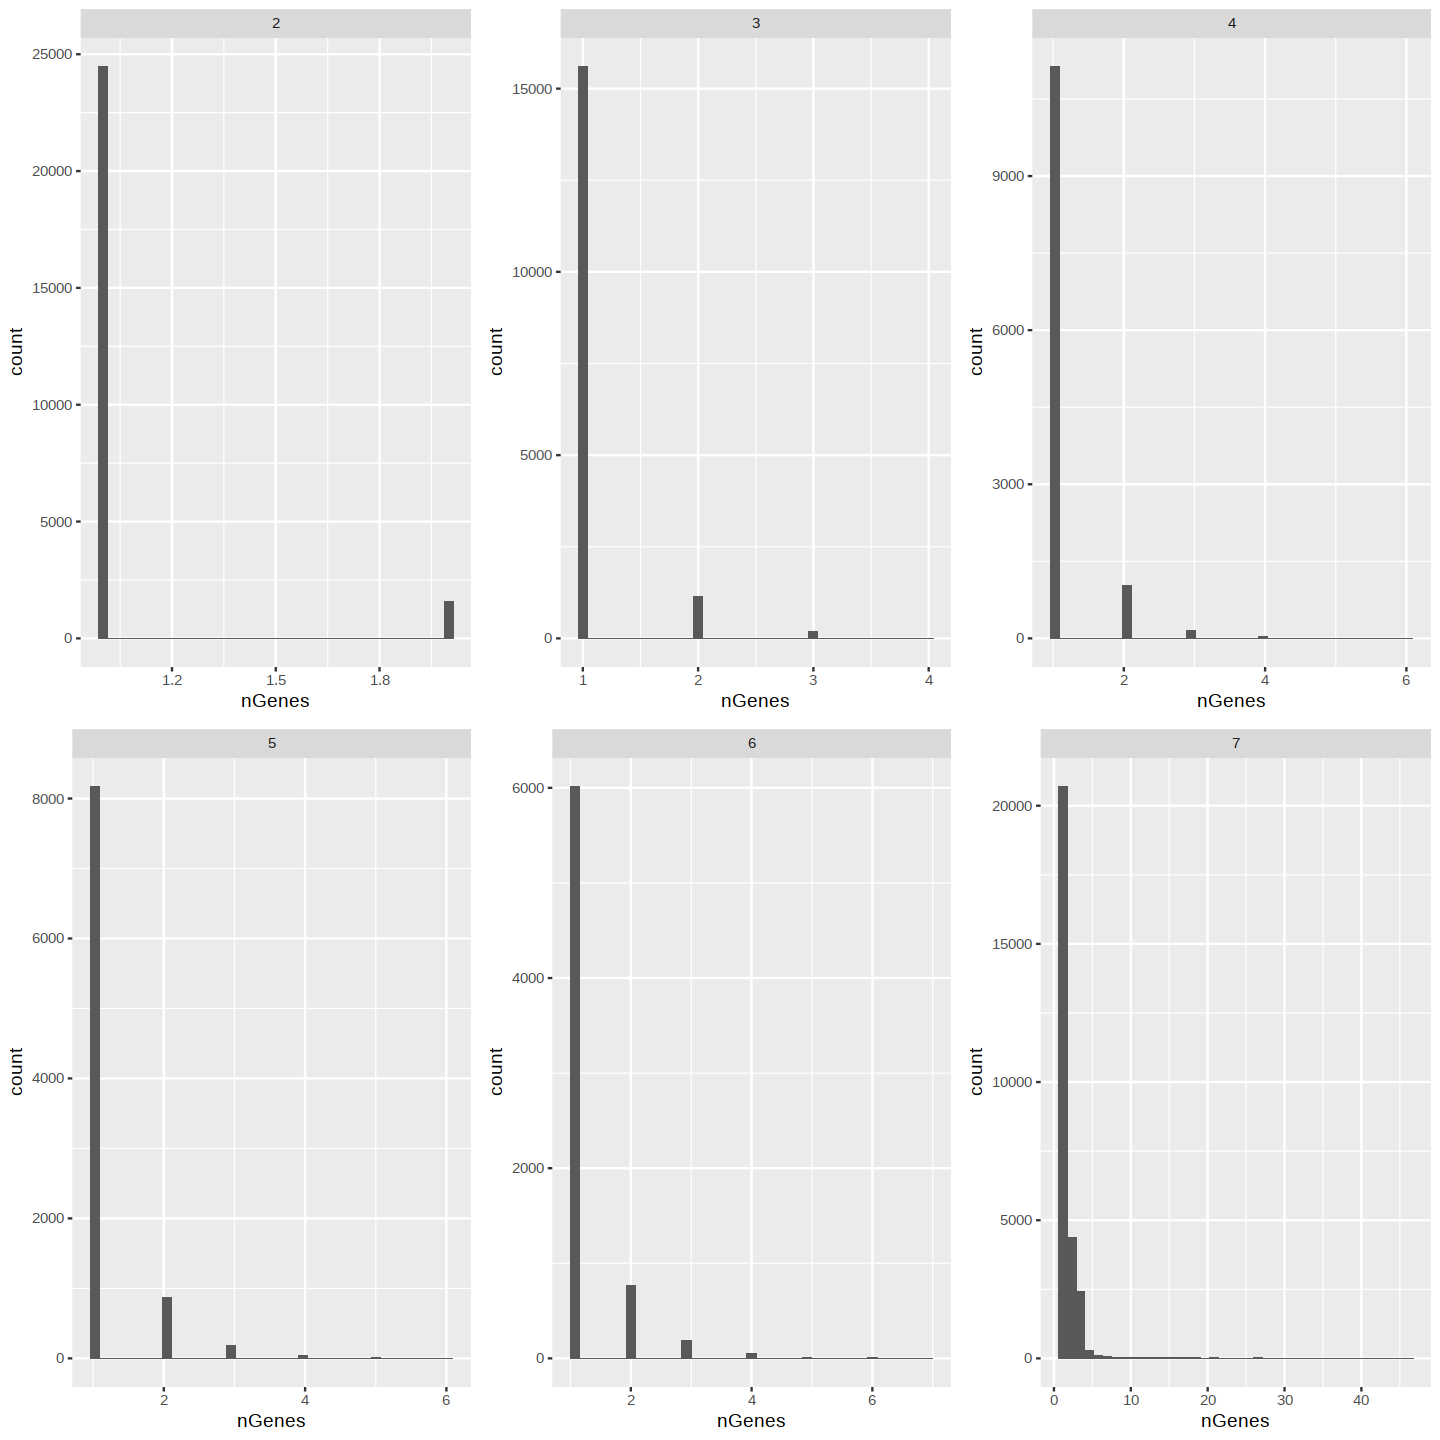

In [30]:
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "MeanInf" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "MeanInf" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)

[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0


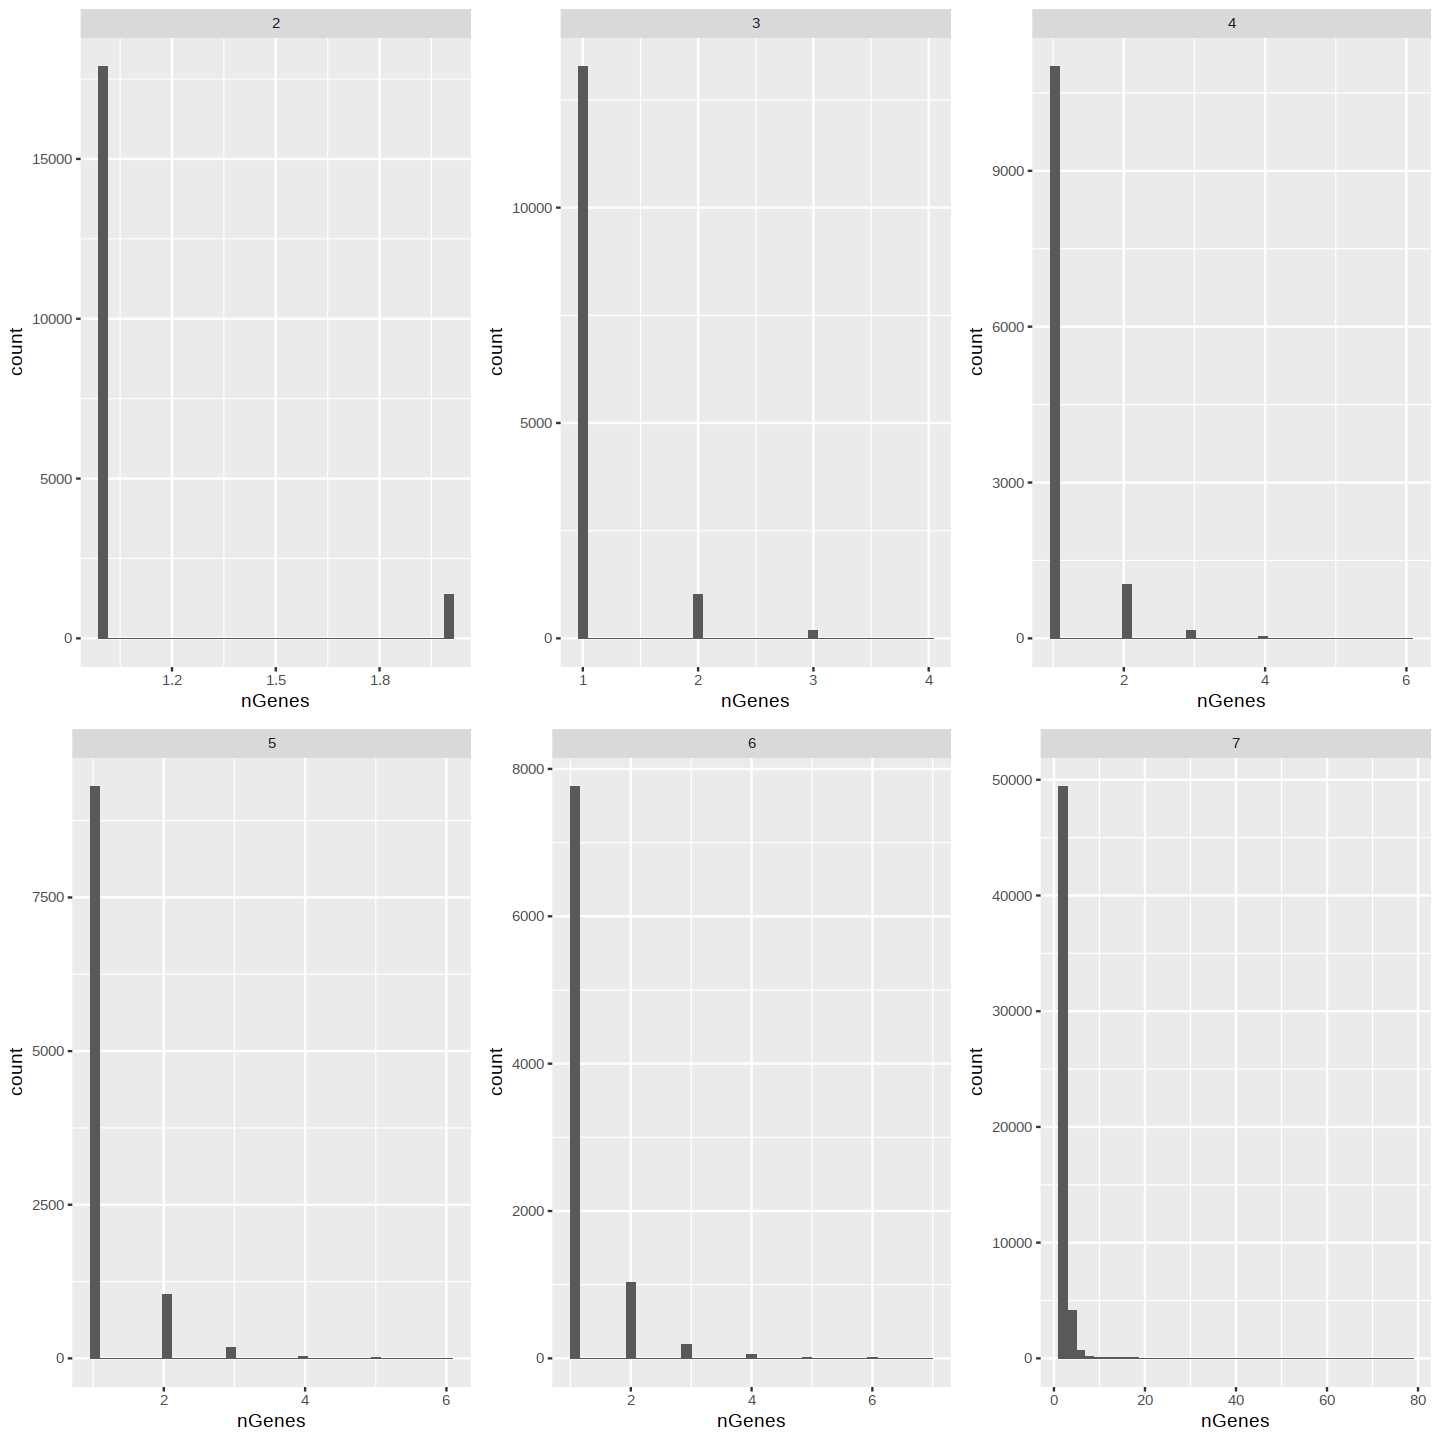

In [31]:
pL <- list()
for(t in seq(2,7)) {
    dd <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes < 100 & depth==t)
    dd2 <- dfNGenes %>% filter(Type == "MeanInf0" & nGenes >= 100 & depth==t)
    print(nrow(dd2))
    pL[[t-1]] <- ggplot(dd, aes(x=nGenes)) + geom_histogram(bins = 40) + facet_wrap(vars(depth))
    
}
ggarrange(plotlist = pL)

In [9]:
table(dfRedInf$type)
which.min(dfRedInf[,1])


Anti-Correlation         Cons_Thr        Consensus          MeanInf 
          202059           146464           221655           181817 

[1] 135558

In [13]:
dfRedInf[135558,]

,red,type
,<dbl>,<chr>
135558,-1200.281,Cons_Thr


In [16]:
dfRCor <- dfRedInf %>% filter(type=="Anti-Correlation")

In [20]:
dfRCor[which.min(dfRCor[,1]),]

,red,type
,<dbl>,<chr>
133423,-960.9102,Anti-Correlation


In [29]:
Descendants(treeCor, 133423)[[1]]

[1] 61055 61056

In [31]:
mapDf[treeCor$tip[Descendants(treeCor, 133423)[[1]]],]

DataFrame with 2 rows and 3 columns
                             GENEID            TXNAME      inds
                        <character>       <character> <integer>
ENST00000625598.1 ENSG00000280614.1 ENST00000625598.1    185571
ENST00000627981.1 ENSG00000281181.1 ENST00000627981.1    185575

In [41]:
match(treeCor$tip[Descendants(treeCor, 133423)[[1]]], treeCons$tip)

[1] 48765 48767

In [35]:
Ancestors(treeMC, 48767)
Ancestors(treeCons, 48765)

[1] 160798 129699

[1] 160799 160798 129699

In [50]:
mapDf[match(treeCons$tip[c(48765,Siblings(treeCons, 48765))], rownames(mapDf)),]

DataFrame with 2 rows and 3 columns
                             GENEID            TXNAME      inds
                        <character>       <character> <integer>
ENST00000625598.1 ENSG00000280614.1 ENST00000625598.1    185571
ENST00000631211.1 ENSG00000280800.1 ENST00000631211.1    185562

In [45]:
match(treeCor$tip[Descendants(treeCor, 133423)[[1]]], rownames(mapDf))
match("ENST00000505680.1", rownames(mapDf))
match("ENST00000514327.5", rownames(mapDf))

[1] 185571 185575

[1] 48766

[1] 48765

In [4]:
setwd('/fs/cbcb-lab/rob/students/noor/Uncertainity/treeTerminusScripts')
suppressPackageStartupMessages(source("tree_helper_function.R"))
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfRedInf.RData")

In [13]:
dfRedInf %>% group_by(type) %>% filter(red>0 & red!=1000) %>% count()

type,n
<chr>,<int>
Anti-Correlation,11813
Cons_Thr,1039
Consensus,36551
MeanInf,25117
MeanInf0,16240


In [14]:
dfRedInf %>% group_by(type) %>% filter(red!=1000) %>% count()

type,n
<chr>,<int>
Anti-Correlation,72361
Cons_Thr,16766
Consensus,91957
MeanInf,99969
MeanInf0,120441


In [15]:
11813/72361
1039/16766
36651/91957
25117/99969
16240/120441

[1] 0.1632509

[1] 0.06197065

[1] 0.3985667

[1] 0.2512479

[1] 0.1348378

**Problem** - Net reudction in infRV is greater for our methods which in turn should imply meanInfRV should be lower however we see that meanInfRV is smaller for correlation. A way of checking will be only plotting infRV for which the reduction is observed. Our methods have 40% nodes that have net increase in infRV and thus not ideal.<br>

At the same time - the proportion is already low for Hirak terminus but we still see that its infRV is larger. We are not collapsing enough - a way to check is take the intersection of txps in Hirak with correlation - hopefully a lot and then plot the structure. Idea being that those nodes can be still benefited from further reduction. makes meanInfRV useless in this case

### Comparing Terminus hirak with anti-correlation tree

So while the magnitude of reduction in infRV is smaller for anti-correlation compared to terminus, the overall infRV distribution is lower for anti-correlation. A guess is that the difference is sheerly due to difference of ndoes and many nodes that have a small infRV reduction in general have low infRV values. Plotting reduction in infRV with infRV of a node, we see a linear trend where greater the reduction in infRV greater the infRV value of a node. We have more such nodes that have lower reduction in InfRV in anti-correlation.

The **extreme points** the one that very low reduction in infRV for terminus could be golden collapses (61). A tertiary look at the transcripts points towards that, the reason many pairs are not picked is because of the threshold criteria.

I have extracted the list of all transcripts that have a positive reduction in infRV, now need to look at the transcripts at the list of all golden collapses (needs to be implemented) and see if that is the case indeed for this.

For the same reduction in infRV, plot the meanInfrv for correlation and terminus
For the same set of transcripts in correlation, plot meanInfRV for correlation and terminus

#### Transcripts in terminus threshold whose ancestors have positive increase in infRV

In [197]:
dfThr <- dfInfRV2 %>% filter(type %in% c("Cons_Thr"))
dim(dfThr)
n <- which(dfThr$redInfRV > 0 & dfThr$redInfRV < 1000 & dfThr$modDep==2)
desc <- unique(unlist(Descendants(treeThr, length(treeThr$tip)+n)))

[1] 146464      5

In [215]:
sort(match(treeThr$tip[desc],rownames(mapDf))-1)[1:10]
mapDf[treeThr$tip[desc[400]],]

[1]   61  152  153  519  521 1832 1833 2434 5461 5463

DataFrame with 1 row and 3 columns
                             GENEID            TXNAME      inds
                        <character>       <character> <integer>
ENST00000445840.2 ENSG00000224813.3 ENST00000445840.2        62

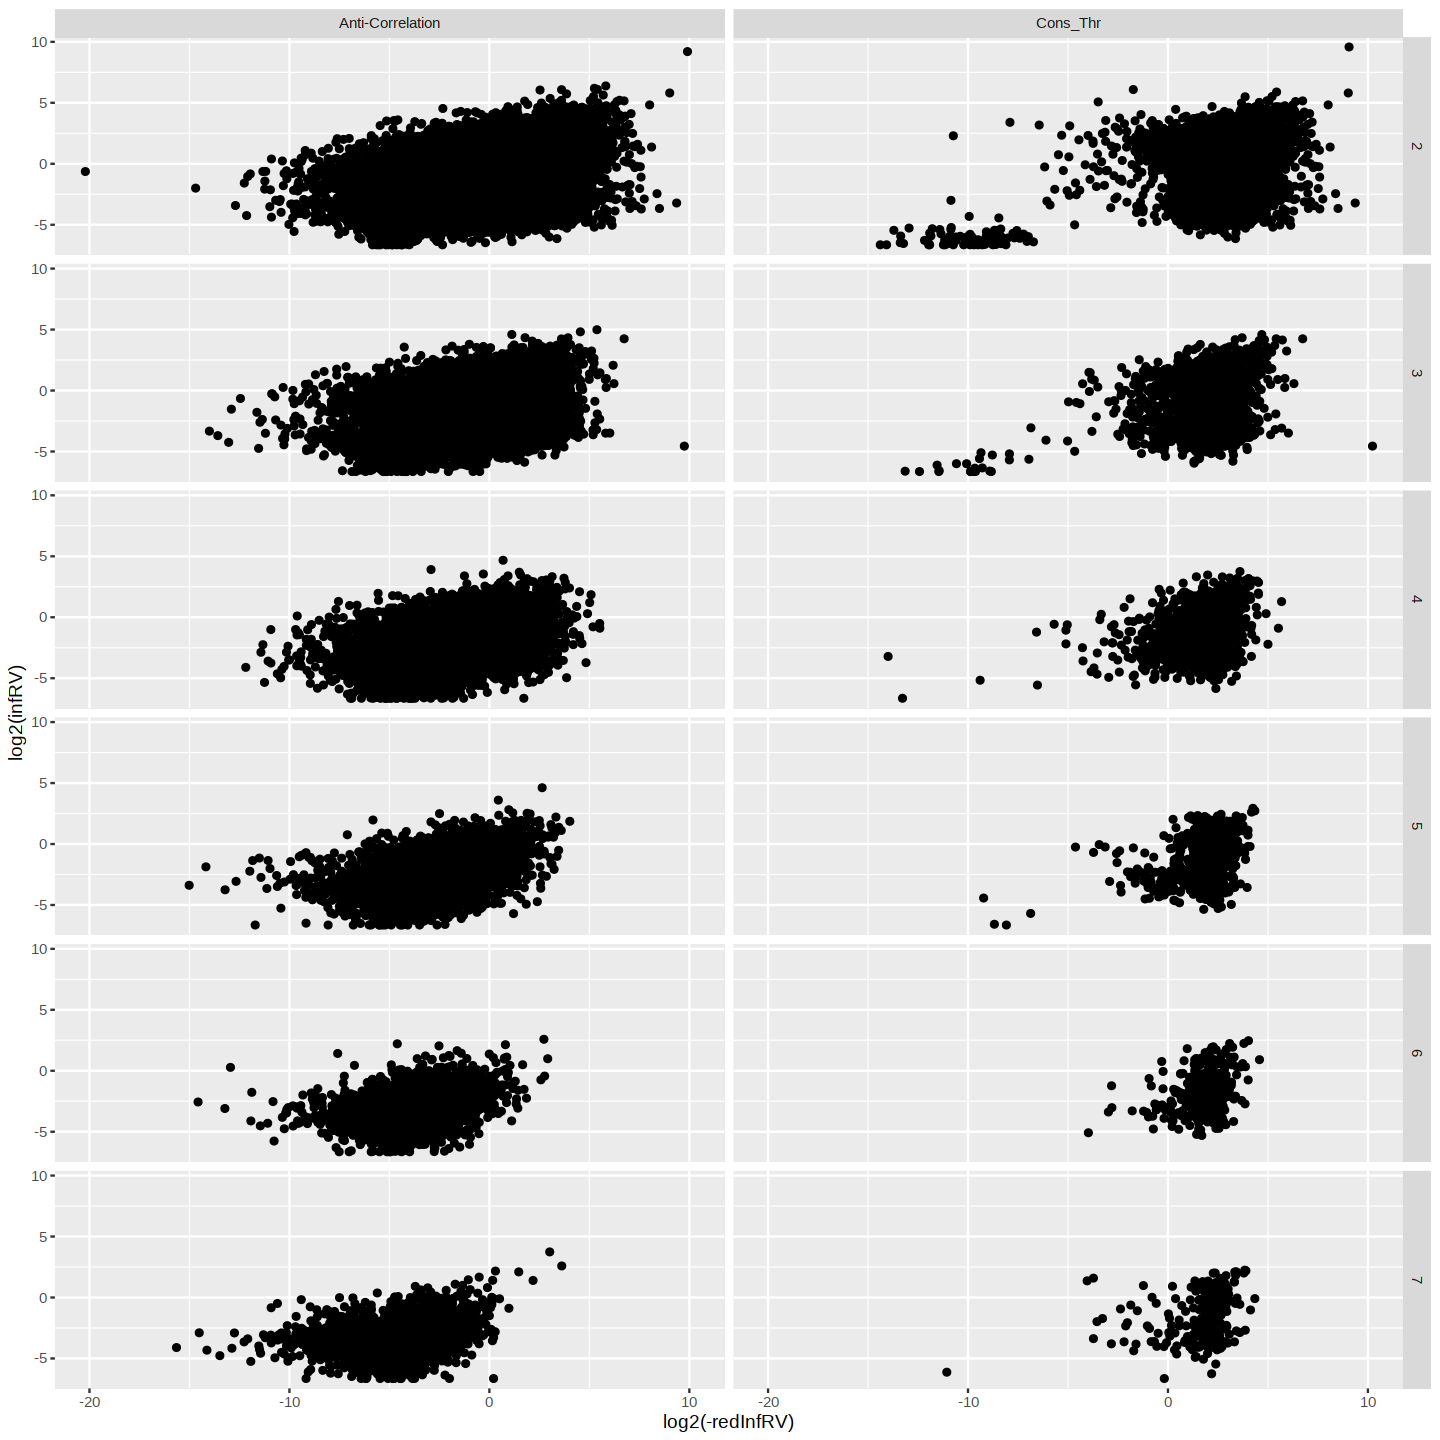

In [137]:
options(repr.plot.width=12, repr.plot.height=12)
dfInfRV %>% filter(type %in% c("Cons_Thr","Anti-Correlation"), redInfRV < 0) %>% ggplot(aes(x=log2(-redInfRV), y=log2(infRV))) + geom_point() + facet_grid(cols = vars(type), rows= vars(modDep))


`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.


type,modDep,median(infRV)
<chr>,<dbl>,<dbl>
Anti-Correlation,2,0.7637104
Anti-Correlation,3,0.4465039
Anti-Correlation,4,0.4219881
Anti-Correlation,5,0.4393259
Anti-Correlation,6,0.4483016
Anti-Correlation,7,0.9254268
Cons_Thr,2,1.0793127
Cons_Thr,3,0.6473562
Cons_Thr,4,0.4896385


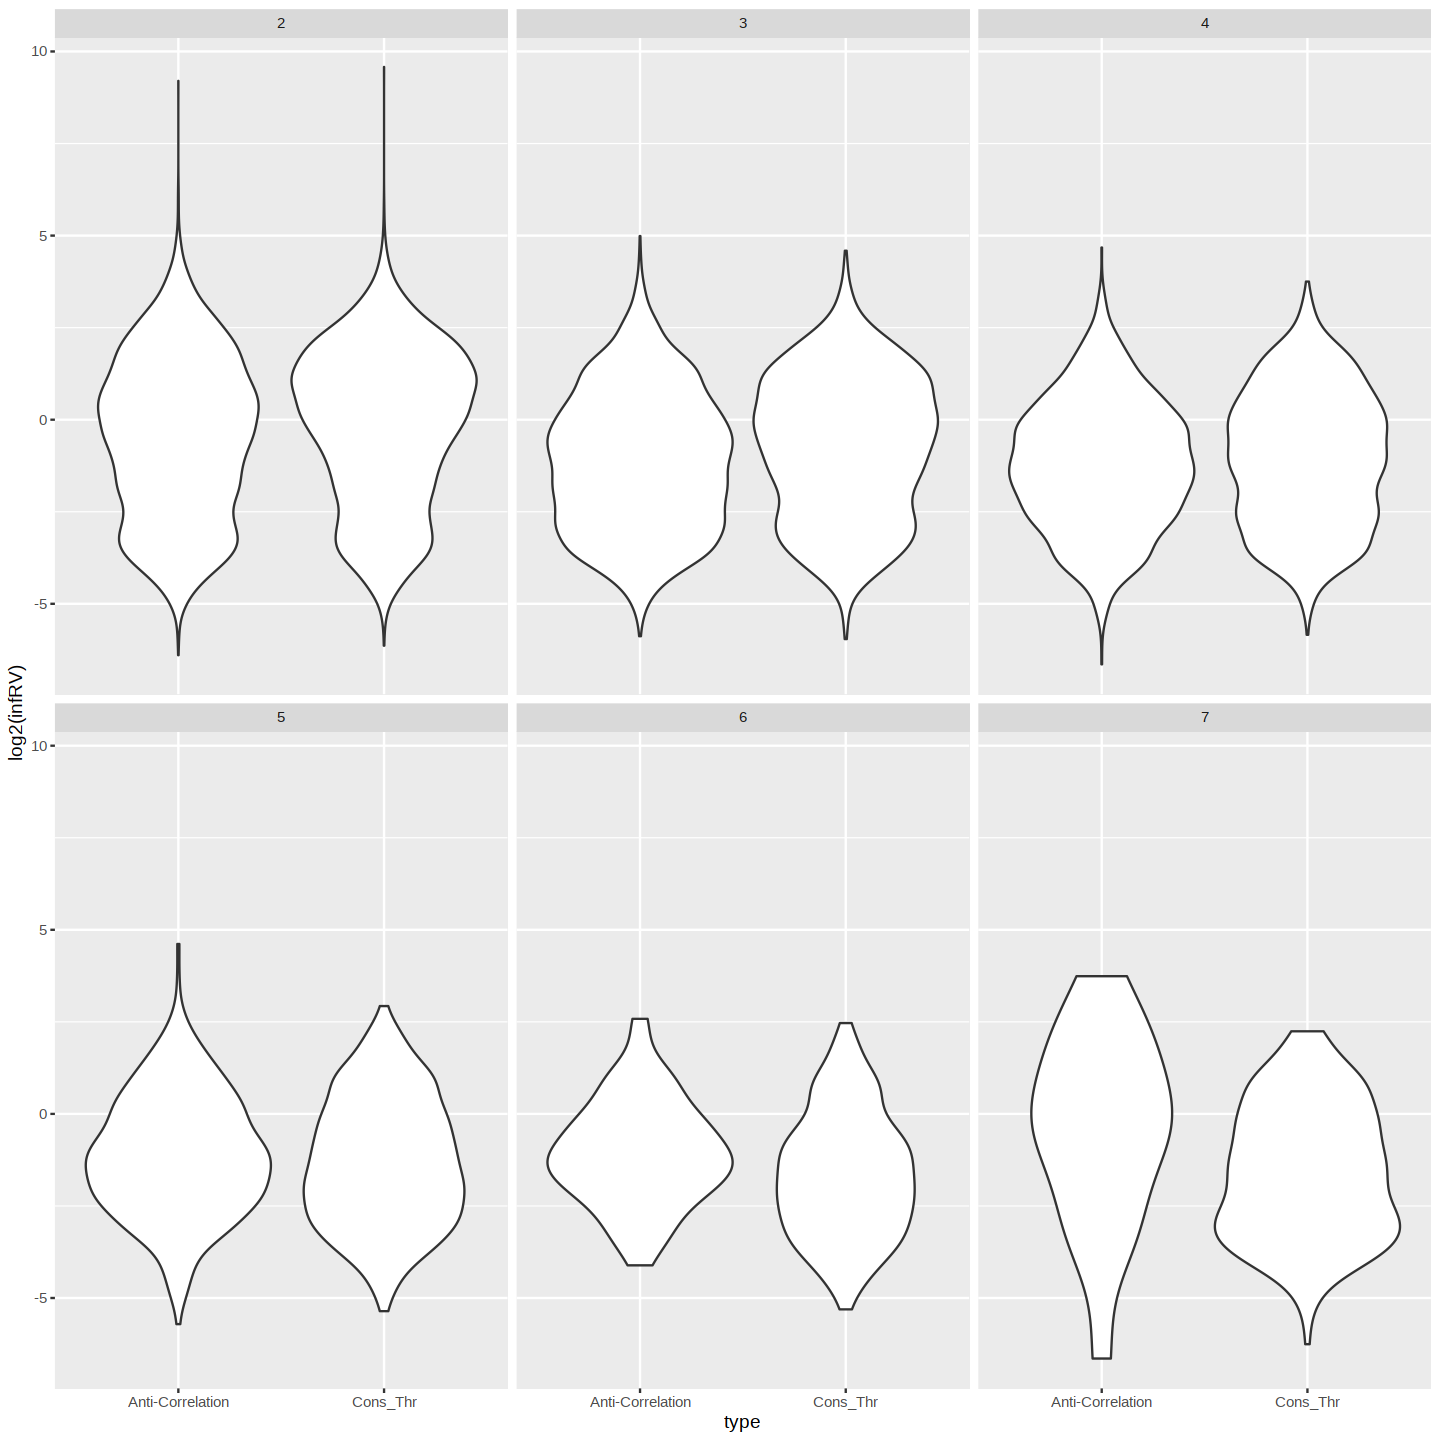

In [224]:
dfInfRV %>% filter(type %in% c("Cons_Thr","Anti-Correlation"), redInfRV < -1) %>% ggplot(aes(x=type, y=log2(infRV))) +  geom_violin() + facet_wrap(vars(modDep))
dfInfRV %>% filter(type %in% c("Cons_Thr","Anti-Correlation"), redInfRV < -1) %>% group_by(type, modDep) %>% summarize(median(infRV))

#### Finding common transcripts

In [16]:
thrTxps <- treeThr$tip[Ancestors(treeThr, seq_along(treeThr$tip), "parent") != length(treeThr$tip)+1]
thrINodes <- length(treeThr$tip)+1:treeThr$Nnode
descThr <- Descendants(treeThr, thrINodes)
thrITxps <- lapply(descThr, function(n) treeThr$tip[n])

In [17]:
corINodes <- length(treeCor$tip)+1:treeCor$Nnode
desc <- Descendants(treeCor, corINodes)
corITxps <- lapply(desc, function(n) treeCor$tip[n])

In [18]:
iCorNodes <- corINodes[sapply(corITxps, function(txps) all(txps %in% thrTxps))]
commTxps <- intersect(treeCor$tip[unique(unlist(Descendants(treeCor,iCorNodes)))], thrTxps)
length(commTxps)
iThrNodes <- thrINodes[sapply(thrITxps, function(txps) all(txps %in% commTxps))]
length(unique(treeThr$tip[unlist(Descendants(treeThr, iThrNodes))]))

[1] 17926

[1] 15810

In [19]:
dfCommCor <- dfInfRV %>% filter(type=="Anti-Correlation")
dfCommCor <- dfCommCor[iCorNodes,]
dfCommThr <- dfInfRV %>% filter(type=="Cons_Thr" & modDep!=1)
#dfCommThr <- dfCommThr[iThrNodes,]

In [20]:
dfCommThr %>% group_by(modDep) %>% summarize(median(infRV))
dfCommCor %>% group_by(modDep) %>% summarize(median(infRV))

dfCommThr %>% group_by(modDep) %>% summarize(median(redInfRV))
dfCommCor %>% group_by(modDep) %>% summarize(median(redInfRV))


modDep,median(infRV)
<dbl>,<dbl>
2,0.9682355
3,0.5907024
4,0.4206948
5,0.3154559
6,0.2607485
7,0.2697061


modDep,median(infRV)
<dbl>,<dbl>
2,1.14412963
3,0.62581977
4,0.47841396
5,0.33676120
6,0.39394190
7,0.04801544


modDep,median(redInfRV)
<dbl>,<dbl>
2,-4.324386
3,-3.736151
4,-3.569749
5,-3.814810
6,-3.836218
7,-4.113294


modDep,median(redInfRV)
<dbl>,<dbl>
2,-4.73487810
3,-4.02418988
4,-3.30107854
5,-1.52703426
6,-0.34857249
7,-0.05739426


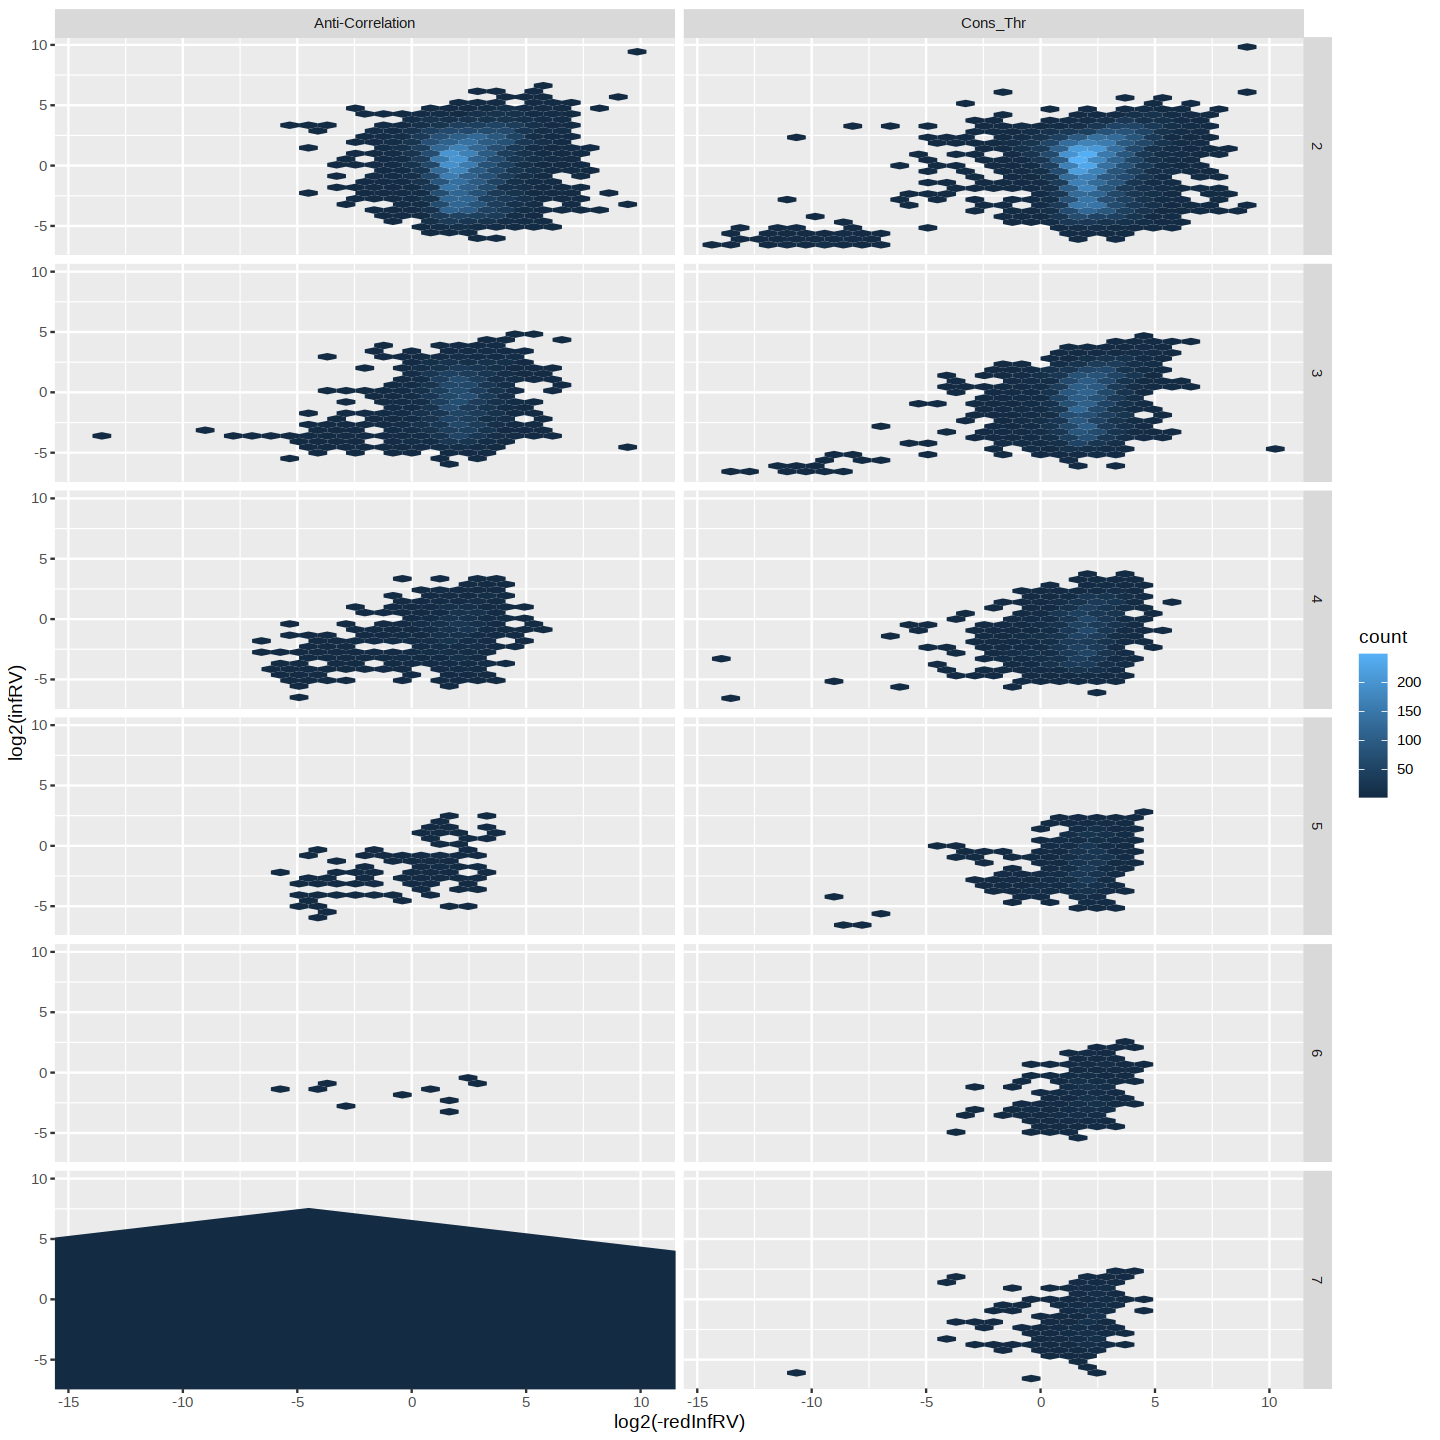

In [217]:
dfCommComb <- rbind(dfCommCor, dfCommThr)
dfCommComb %>% filter(type %in% c("Cons_Thr","Anti-Correlation"), redInfRV < 0) %>% ggplot(aes(x=log2(-redInfRV), y=log2(infRV))) + geom_hex() + facet_grid(cols = vars(type), rows= vars(modDep))

Warning message:
"Groups with fewer than two data points have been dropped."


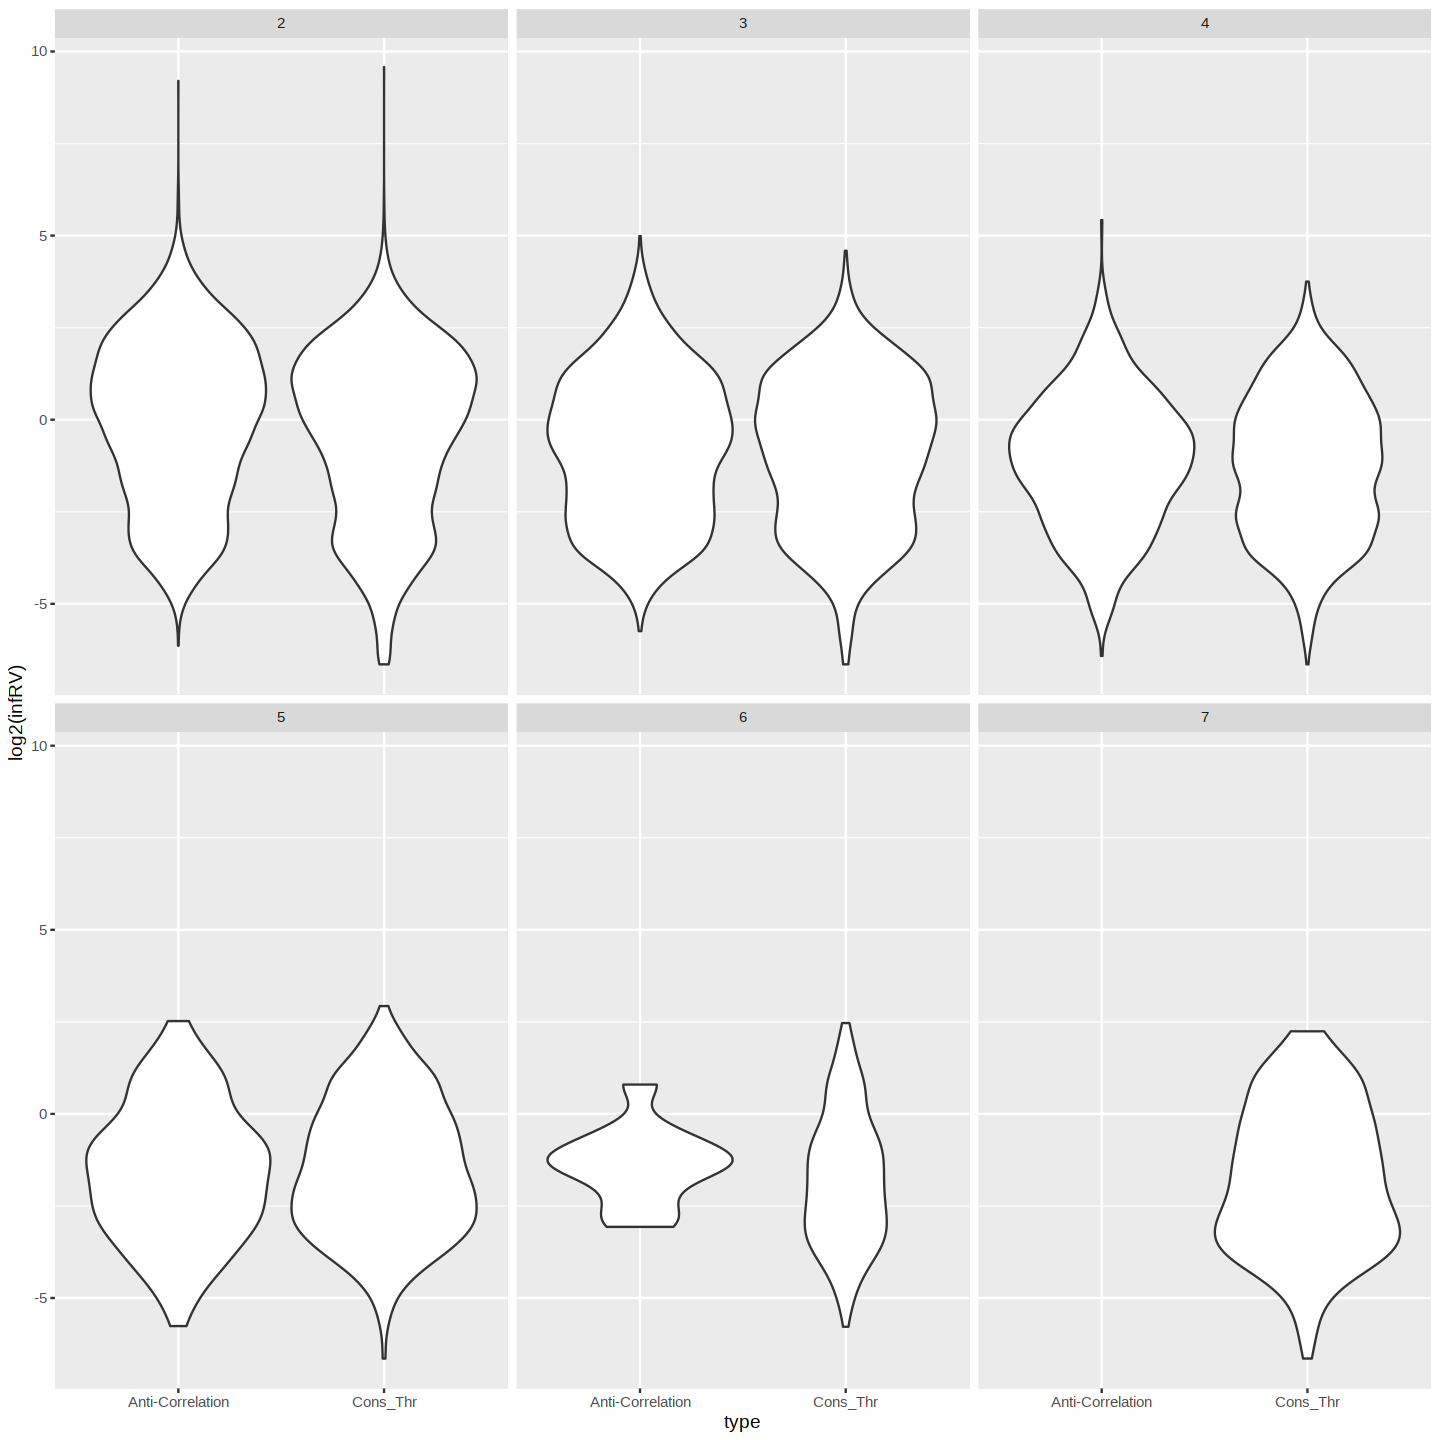

In [219]:
dfCommComb %>%  ggplot(aes(x=type, y=log2(infRV)) )+ geom_violin() + facet_wrap(vars(modDep))

#### Net Reduction in infRV and infRV

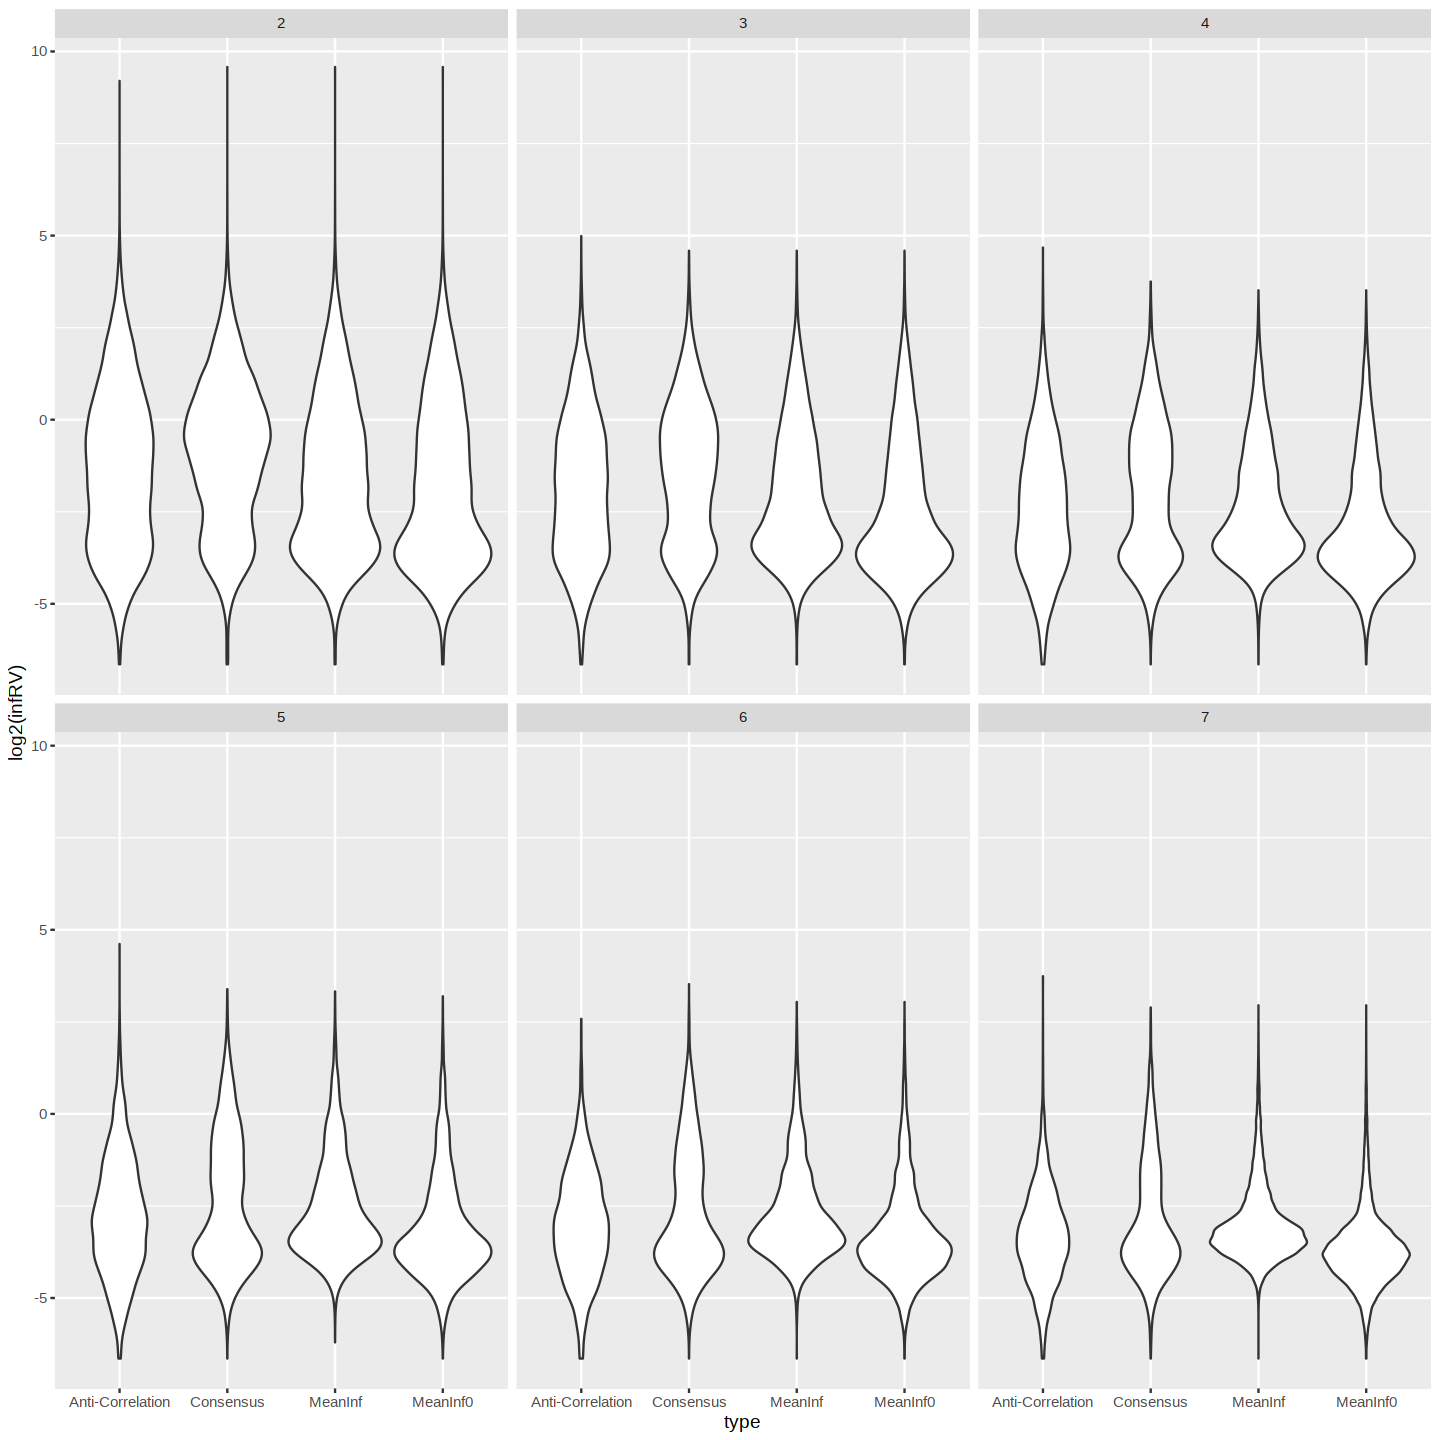

`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.


type,modDep,median(infRV)
<chr>,<dbl>,<dbl>
Anti-Correlation,2,0.37714671
Anti-Correlation,3,0.25462871
Anti-Correlation,4,0.17755695
Anti-Correlation,5,0.13356507
Anti-Correlation,6,0.11717981
Anti-Correlation,7,0.09452688
Consensus,2,0.56233626
Consensus,3,0.36711670
Consensus,4,0.22351461


`summarise()` has grouped output by 'type'. You can override using the `.groups` argument.


type,modDep,median(redInfRV)
<chr>,<dbl>,<dbl>
Anti-Correlation,2,-0.69485833
Anti-Correlation,3,-0.46201602
Anti-Correlation,4,-0.22321946
Anti-Correlation,5,-0.10774602
Anti-Correlation,6,-0.07027255
Anti-Correlation,7,-0.04249141
Consensus,2,-1.39071459
Consensus,3,-0.95120404
Consensus,4,-0.71819797


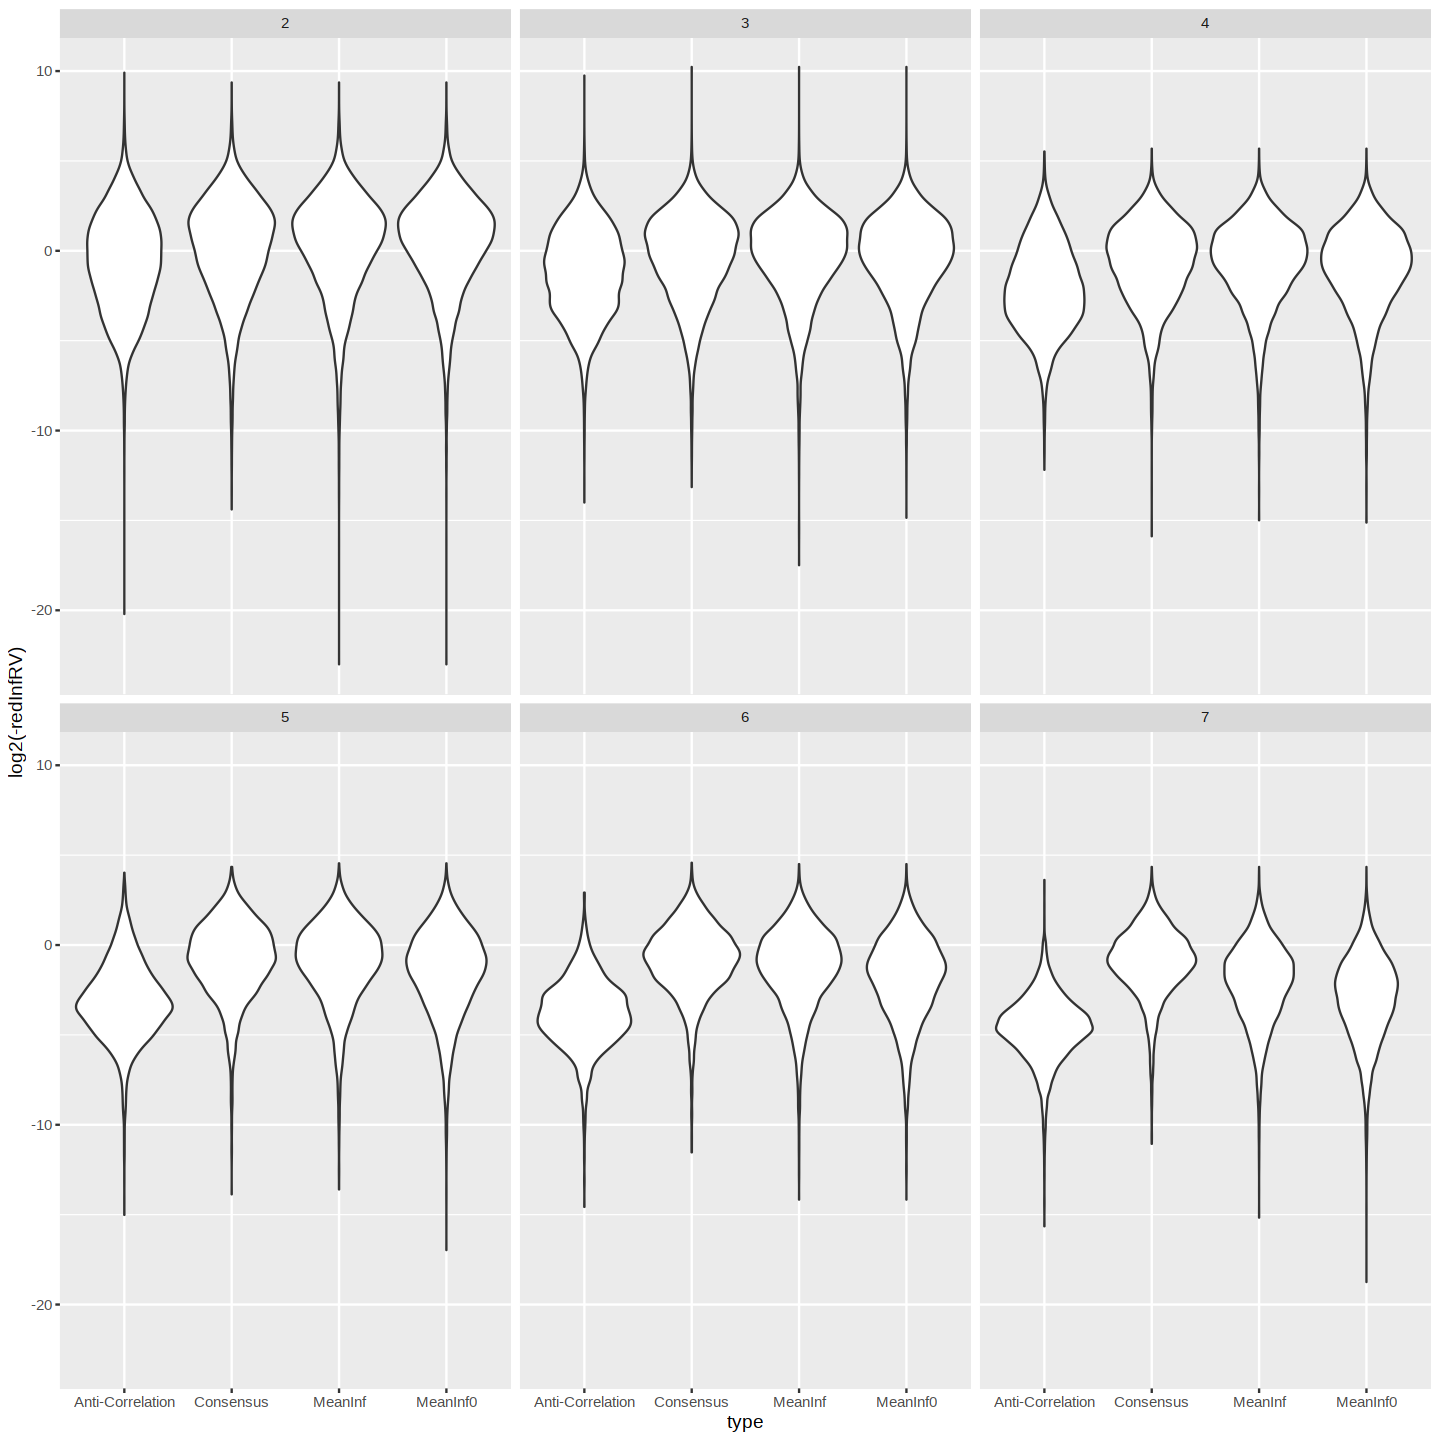

In [26]:
options(repr.plot.width=12, repr.plot.height=12)
dfComm <- dfInfRV %>% filter(type!="Cons_Thr", redInfRV < 0)
ggplot(dfComm, aes(x=type,y=log2(infRV))) + geom_violin() + facet_wrap(vars(modDep))
ggplot(dfComm, aes(x=type,y=log2(-redInfRV))) + geom_violin() + facet_wrap(vars(modDep))
dfComm %>% group_by(type, modDep) %>% summarize(median(infRV))
dfComm %>% group_by(type, modDep) %>% summarize(median(redInfRV))

In [27]:
dfInfRV$node <- seq(nrow(dfInfRV))
for(f in levels(factor(dfInfRV$type))) {
    tInds <- which(dfInfRV$type == f)
    dfInfRV[["node"]][tInds[1]:tInds[length(tInds)]] = seq(length(tInds))
}
save(dfInfRV, file="environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfInfRV.RData")

In [18]:
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/mean_cons/dfInfRV.RData")

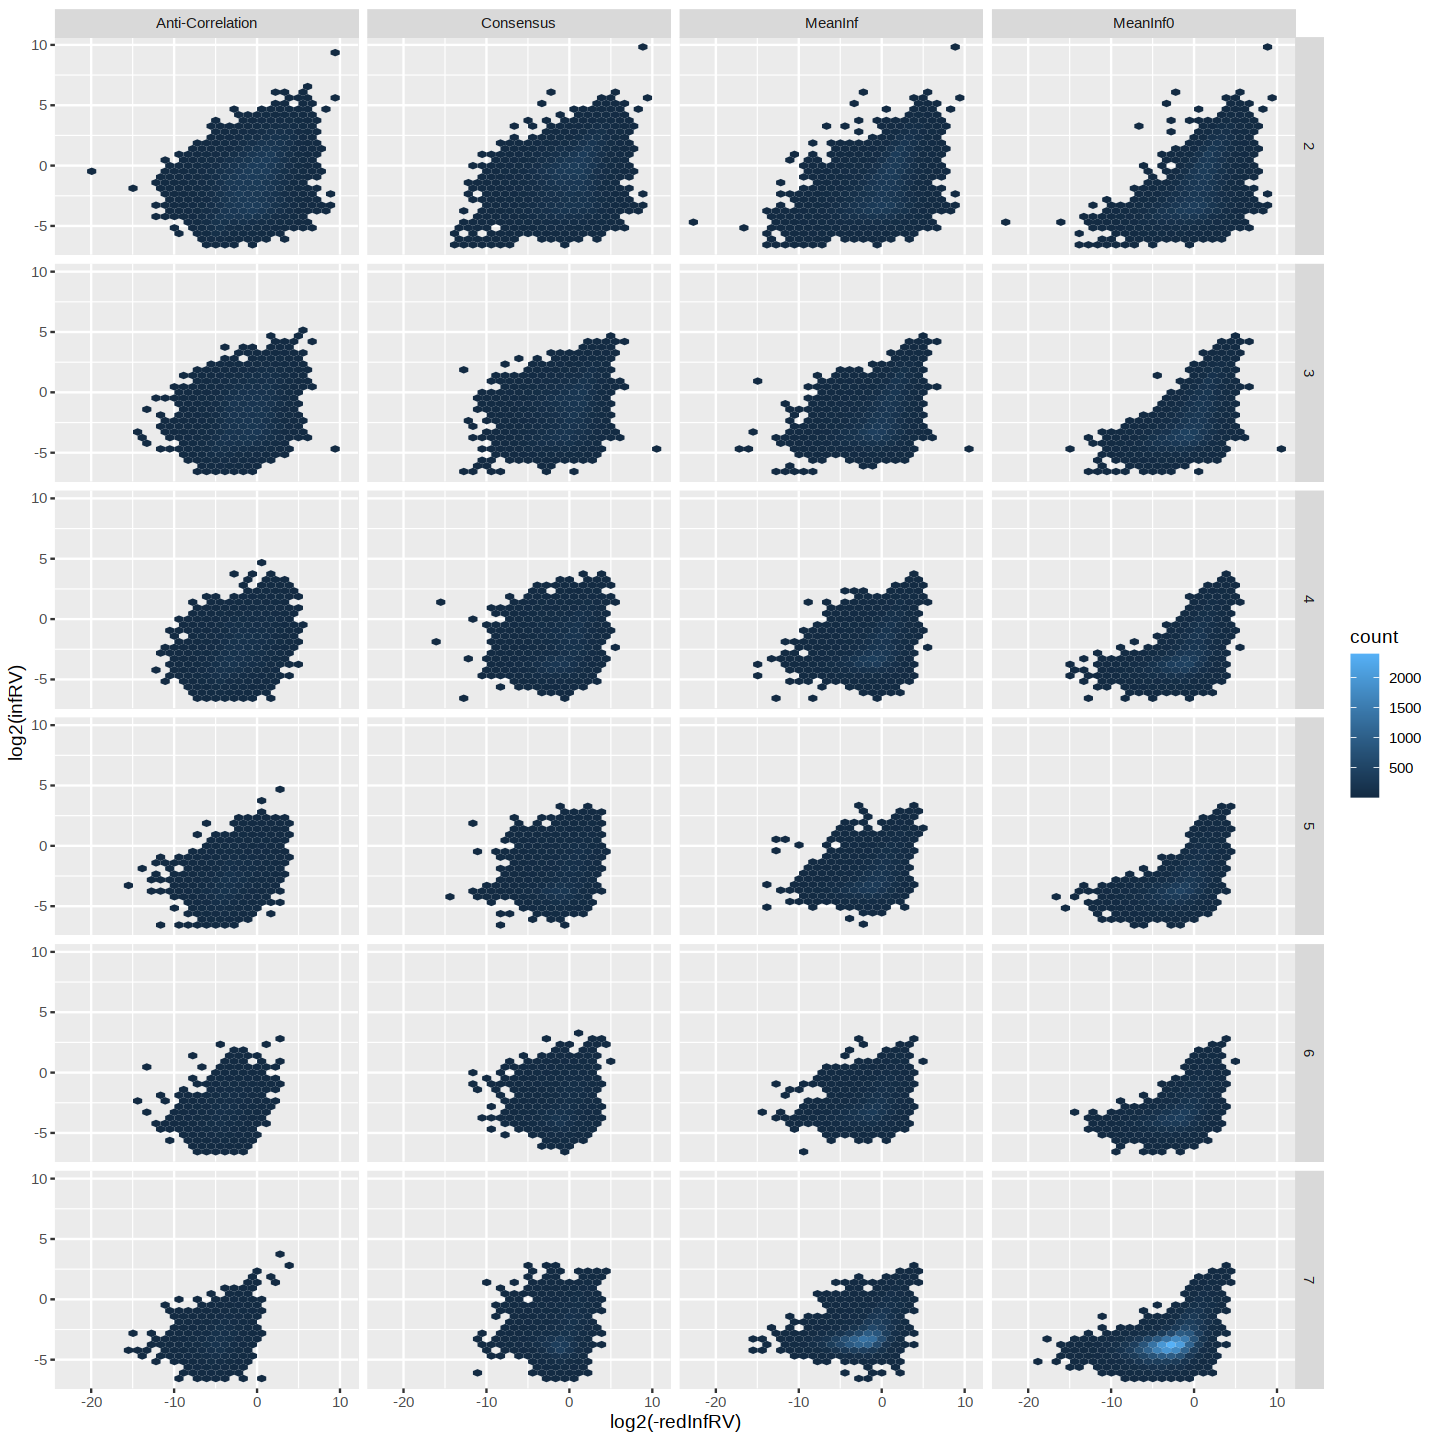

In [22]:
ggplot(dfComm, aes(x=log2(-redInfRV),y=log2(infRV))) + geom_hex() + facet_grid(rows =vars(modDep), cols=vars(type))

Observations
Higher the infReduction more the infRV at a node
why is meanInfRV sucking at absolute mean
Differences between meanInfRV and consensus (why are we not picking that many transcripts for meanInf(

### Investigating why the transcripts in consensus are missing in mean inf tree

There are three stopping criteria in the tree construction, means across posterior samples > 0.1, spread > 0.1 and
mean percentile invRV is less than a certain threshold. Another would be transcripts that were part of golden collapses but somehow did not make the cut.

We have fixed this by fixing the code and are thus directly analyzing now with the updated code. The main responsible cause was the criteria of infRV threshold, spread and mean were responsible for hardly 3-4K transcripts. 

In [22]:
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/seBrainSim.RData")
infReps <- assays(seBrainSim)[grep("infRep", assayNames(seBrainSim))]
infReps <- abind::abind(as.list(infReps), along = 3)
infMean <- apply(infReps, 1:2, mean)
infVar <- apply(infReps, 1:2, var)
infMax <- apply(infReps, 1:2, max)
infMin <- apply(infReps, 1:2, min)

infRV <- pmax(infVar-infMean-1,0)/(infMean+5) + 0.01
sp <- (infMax-infMin)/infMean
sp[is.na(sp)] <- Inf
spM <- rowMeans(sp)
infMeanM <- rowMeans(infMean)

# tr <- read.tree("../terminus/1_1/group_nwk.txt")
# txpMC <- as.numeric(unlist(lapply(tr, function(t) t$tip)))
# txpMC <- mapDf[txpMC+1,2]

#### Loading the consensus tree and mean inf Tree

In [4]:
tr <- read.tree("../terminus/1_2/group_nwk.txt")
txpMC <- as.numeric(unlist(lapply(tr, function(t) t$tip)))
txpMC <- mapDf[txpMC+1,2]
trCons <- read.tree("../brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/out_term/cluster_nwk.txt")
txpCons <- as.numeric(unlist(lapply(trCons, function(t) t$tip)))
txpCons <- mapDf[txpCons+1,2]
length(txpCons)
length(txpMC)
length(setdiff(txpCons, txpMC))
length(setdiff(txpMC, txpCons))
consOnly <- setdiff(txpCons, txpMC)

[1] 122177

[1] 121237

[1] 5145

[1] 4205

There are 5145 transcripts unique to consensus and 4205 unique to mean inf

In [11]:
term_dir <- "/fs/cbcb-lab/rob/students/noor/Uncertainity/terminus/test"
gold_files <- file.path(term_dir,as.vector(outer(c(1:6), (1:2), function(x,y) paste(x,y,sep="_"))), "golden_collapses.log")
df_gold <- lapply(gold_files, function(file) read.delim(file, header=F))
gold_txps <- lapply(df_gold, function(df) c(df[,1], df[,2]))
gold_txps <- rownames(seBrainSim)[unique(unlist(gold_txps))+1]

gold_mean_txps <- read.delim("/fs/cbcb-lab/rob/students/noor/Uncertainity/terminus/1_1/golden_collapses.log", header = F)
gold_mean_txps <- rownames(seBrainSim)[unique(c(gold_mean_txps[,1],gold_mean_txps[,2]))+1]
length(gold_txps)
length(gold_mean_txps)

consOnlyTxps <- setdiff(treeCons$tip, txpMC)
length(consOnlyTxps)

gold_rem <- setdiff(gold_txps, gold_mean_txps)
length(gold_rem)
length(intersect(consOnlyTxps, gold_rem))

[1] 2769

[1] 984

[1] 11512

[1] 1785

[1] 382

#### Existing trees structure provides an idea of threshold on infRV
Conensus tree in a way reflects that we wont aggregate those transcripts/nodes that have an infRV beyond the threshold (here 0.25).
So I take children of root nodes that have atleast children themseleves. Ideally all these subchildren should have infRV greater than threshold, thats why I take the minimum infRV of subchildren for a given node. Only 1.9% of nodes have meanInfRV less than threshold. Out of these majority of them contain atleast one descendant transcript that is part of threshold. Now it also might happen that since I am computing mean, it might be actually just because of the consensus algorithm and nothing more.

In [8]:
source("brain_simulation_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/tree_analysis/tree_filter.R")
infSub <- computeInfRV(y = yAggConsNS, subOne = T)
child <- Descendants(treeCons, length(treeCons$tip)+1, "children")
desc <- sapply(Descendants(treeCons, child), length)
child <- child[desc > 1]
cIRV <- sapply(Descendants(treeCons, child), function(nodes) {
  min(sapply(nodes, function(n) max(infSub$infRV[n,])))
})

In [12]:
which(cIRV < 0.25)[1:10]
infSub$infRV[Descendants(treeCons,child[1045],"child"),]
mean(cIRV < 0.278)
sum(cIRV < 0.278)
sum(sapply(Descendants(treeCons, child[cIRV < 0.278]), function(node) sum(treeCons$tip[node] %in% gold_txps) > 0))


[1] 1045 1248 1439 2207 3597 3811 4936 4988 5330 5736

,1_1,2_1,3_1,4_1,5_1,6_1,1_2,2_2,3_2,4_2,5_2,6_2
136144,0.1851199,0.1495965,0.0924751,0.1228464,0.08067736,0.1520100,0.010000,0.09155998,0.08613336,0.0100000,0.02665647,0.0913257
ENST00000592784.5,0.2069318,0.2270442,0.2017304,0.1800987,0.26973607,0.1882243,0.232554,0.21201552,0.22562109,0.1785468,0.25494969,0.1772706


[1] 0.01992301

[1] 295

[1] 285

From here it seems most of the child nodes that infRV of less 0.278 have atleast one child txp as golden collapse. So the next step is to look for the neigbors of the above missing transcripts and see if their siblings in the consensus graph had meaninfrv less than threshold and thats the reason we cannot merge. Now, I look at the descendants of the siblings, map them to meanInf tree and look at the infRV of the highest ancestor below root - since this is where the merging happens. Looking at some examples, it seems this indeed is the case. 

In [45]:
sort(match(consOnly, rownames(seBrainSim)), decreasing=T)-1

[1] 198794 198791 198536 198358 198347 198329 198267 198253 198228 198088
  [11] 198059 198052 197962 197949 197941 197939 197936 197929 197926 197870
  [21] 197845 197767 197766 197712 197617 197587 197585 197549 197535 197524
  [31] 197304 197272 197266 197265 197264 197256 197184 197160 197158 197113
  [41] 197110 197019 196999 196972 196949 196933 196904 196862 196824 196811
  [51] 196805 196685 196683 196667 196606 196605 196579 196532 196517 196514
  [61] 196512 196510 196486 196478 196472 196461 196254 196187 196119 196092
  [71] 196056 195942 195844 195831 195790 195788 195694 195636 195494 195319
  [81] 195318 195316 195256 195248 195241 195086 195084 195079 195053 195036
  [91] 195016 194837 194636 194620 194510 194429 194390 194022 193973 193961
 [101] 193842 193841 193839 193756 193755 193746 193715 193711 193678 193657
 [111] 193587 193581 193580 193552 193551 193457 193456 193361 193360 193309
 [121] 193216 193101 193071 192951 192934 192932 192921 192887 192729 192721
 [131] 192715 192552 192413 192227 192226 192209 192169 192168 192144 192139
 [141] 192138 192130 192120 192105 192090 192023 191967 191952 191914 191908
 [151] 191907 191850 191825 191816 191815 191793 191631 191626 191579 191569
 [161] 191539 191494 191441 191359 191354 191226 191212 191211 191183 191182
 [171] 191178 191168 191162 191161 191154 191129 191102 191058 191038 191035
 [181] 190924 190920 190919 190900 190898 190828 190827 190721 190718 190685
 [191] 190684 190682 190543 190515 190510 190488 190485 190481 190465 190461
 [201] 190392 190389 190368 190274 190127 190123 190122 190121 190081 190040
 [211] 190037 190016 189998 189993 189986 189976 189939 189923 189919 189912
 [221] 189840 189820 189734 189731 189693 189690 189687 189668 189661 189659
 [231] 189622 189582 189455 189413 189384 189290 189256 189217 189184 189177
 [241] 189154 189141 189110 189061 189052 189051 188943 188796 188751 188731
 [251] 188723 188700 188636 188613 188597 188563 188555 188525 188496 188399
 [261] 188394 188374 188366 188337 188243 188218 188193 188192 188173 188172
 [271] 188166 188123 188040 188036 187945 187943 187932 187931 187907 187867
 [281] 187810 187774 187765 187679 187678 187557 187543 187510 187427 187289
 [291] 187143 187128 187127 187126 187124 187123 187122 187113 187112 187094
 [301] 187091 187056 187055 187054 186952 186951 186881 186879 186780 186778
 [311] 186697 186651 186626 186622 186615 186481 186477 186476 186455 186436
 [321] 186415 186394 186371 186368 186328 186304 186300 186295 186293 186284
 [331] 186012 185967 185964 185953 185681 185676 185488 185442 185418 185377
 [341] 185336 185321 185319 185311 185281 185277 185276 185238 185187 185119
 [351] 185118 185042 184949 184929 184920 184918 184904 184880 184868 184799
 [361] 184776 184570 184500 184357 184351 184153 184138 184114 184084 184072
 [371] 184007 183869 183782 183639 183637 183416 183413 183378 183341 183340
 [381] 183335 183268 183254 183245 183239 183230 183221 183218 183179 183117
 [391] 183062 182958 182957 182956 182951 182919 182910 182831 182827 182824
 [401] 182800 182741 182722 182607 182605 182598 182589 182360 182358 182341
 [411] 182330 182329 182299 182142 182118 182117 182104 182077 182073 182066
 [421] 182032 181935 181932 181919 181918 181917 181901 181900 181895 181894
 [431] 181872 181852 181846 181813 181738 181664 181395 181262 181234 181227
 [441] 181225 181192 181112 181095 181014 180992 180941 180936 180862 180861
 [451] 180803 180792 180777 180751 180736 180729 180721 180690 180634 180628
 [461] 180602 180516 180504 180427 180355 180257 180192 180148 180145 180144
 [471] 180113 180088 180055 180033 179967 179949 179901 179845 179793 179775
 [481] 179774 179709 179695 179596 179568 179447 179446 179440 179416 179298
 [491] 179277 179131 179086 179083 179049 178998 178939 178918 178795 178755
 [501] 178671 178668 178644 178638 178606 178605 178596 178588 178536 178514
 [511] 178513 178504 178490 178345 178235 178234 178227 178226 178109 178095

In [13]:
load("environment/brain_sim_nodtu/mode=gc_bias/post_type=gibbs_nrep=100_tf=100/tree.RData")

In [46]:
treeMC2 <- mergeTree(tr, se = mapDf)
se <- scaleInfReps(seBrainSim)
se <- labelKeep(se)
totalTxps <- union(treeMC2$tip, tree$tip)
mb <- mergeLeaves(treeMC2, se[totalTxps,])
treeMC2 <- mb[["tree"]]
yMeanInf <- mb[["ySwish"]]
rm(mb)
gc()
yMeanInf <- runSwishTree(treeMC2, yMeanInf, type = "union")
sum(rownames(yMeanInf) != treeMC2$tip)

yMeanInfNS <- seBrainSim[treeMC2$tip,]
yAggMeanInfNS <- prepSwish(treeMC2, yMeanInfNS)
inf <- computeInfRV(yAggMeanInfNS, subOne = T, rMean = F)

[1] "Missing txps 11692"


,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,10863490,580.2,18540951,990.2,18540951,990.2
Vcells,1450578011,11067.1,2304138174,17579.2,2304134578,17579.2


[1] 0

In [62]:
head(inf$infRV)

,1_1,2_1,3_1,4_1,5_1,6_1,1_2,2_2,3_2,4_2,5_2,6_2
ENST00000419160.3,0.07140284,0.1493284,0.09346394,0.06893520,0.23829209,0.16680591,0.1687051,0.01000000,0.01000000,0.01,0.01000000,0.01000000
ENST00000416931.1,0.17004584,0.2657062,0.01000000,0.01000000,0.01000000,0.44405957,0.0100000,0.10584946,0.01000000,0.01,0.03374668,0.01000000
ENST00000457540.1,0.16238657,0.0574085,0.03938376,0.01000000,0.14709106,0.22563721,0.1285741,0.09827585,0.24138229,0.01,0.30686865,0.02270266
ENST00000414273.1,0.36354260,0.2609332,0.04132745,0.20991093,0.12816156,0.01000000,0.2072034,0.01000000,0.01000000,0.01,0.01000000,0.55940535
ENST00000427426.1,0.20939299,0.0100000,0.01000000,0.01000000,0.06916241,0.02548651,0.0100000,0.10791937,0.06334771,0.01,0.02836834,0.22288621
ENST00000514057.1,0.01000000,0.0100000,0.01000000,0.05806284,0.01000000,0.03243786,0.3142771,0.06994279,0.12394236,0.01,0.01000000,0.01000000


In [65]:
Siblings(treeCons,match(rownames(seBrainSim)[198794+1],treeCons$tip))
txps <- treeCons$tip[Descendants(treeCons,176653)[[1]]]
txps
match(txps, rownames(seBrainSim))-1

match(txps, treeMC2$tip)
Ancestors(treeMC2,match(txps, treeMC2$tip))
inf$infRV[175364,]


[1] 176653

[1] "ENST00000454054.5" "ENST00000440554.1"

[1] 198789 198792

[1] 63754 63753

[[1]]
[1] 175366 175365 175364 132466

[[2]]
[1] 175367 175366 175365 175364 132466

1_1       2_1       3_1       4_1       5_1       6_1       1_2       2_2 
0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 
      3_2       4_2       5_2       6_2 
0.0100000 0.1831398 0.1163594 0.1239328

In [72]:
Siblings(treeCons,match(rownames(seBrainSim)[198791+1],treeCons$tip)) ### Sibling in consensus tree
txps <- treeCons$tip[Descendants(treeCons,176652)[[1]]]
txps
match(txps, rownames(seBrainSim))-1

match(txps, treeMC2$tip) ##Trying to find if the descendants of the sibling exist in the nearest tree
Ancestors(treeMC2,match(txps, treeMC2$tip))###Looking at the infRV of the highest ancestor
inf$infRV[175364,]

txps <- treeCons$tip[Descendants(treeCons,176654)[[1]]]
txps
match(txps, treeMC2$tip) ##Trying to find if the descendants of the sibling exist in the nearest tree
Ancestors(treeMC2,match(txps, treeMC2$tip))###Looking at the infRV of the highest ancestor
inf$infRV[175364,]

match(c(69826,69829), treeMC2$tip) ##Trying to find if the descendants of the sibling exist in the nearest tree

[1] 176652  69826 176654  69829

[1] "ENST00000454054.5" "ENST00000440554.1" "ENST00000472510.5"

[1] 198789 198792 198794

[1] 63754 63753  9127

[[1]]
[1] 175366 175365 175364 132466

[[2]]
[1] 175367 175366 175365 175364 132466

[[3]]
[1] 132466

1_1       2_1       3_1       4_1       5_1       6_1       1_2       2_2 
0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 
      3_2       4_2       5_2       6_2 
0.0100000 0.1831398 0.1163594 0.1239328

[1] "ENST00000336079.7" "ENST00000360160.8"

[1] 63752 63751

[[1]]
[1] 175368 175367 175366 175365 175364 132466

[[2]]
[1] 175368 175367 175366 175365 175364 132466

1_1       2_1       3_1       4_1       5_1       6_1       1_2       2_2 
0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 0.0100000 
      3_2       4_2       5_2       6_2 
0.0100000 0.1831398 0.1163594 0.1239328

[1] NA NA

In [80]:
Siblings(treeCons,match(rownames(seBrainSim)[6590+1],treeCons$tip))
Descendants(treeCons,148780)
txps <- treeCons$tip[Descendants(treeCons,148780)[[1]]]
txps
match(txps, rownames(seBrainSim))-1
match(intersect(txps,txpMC), treeMC2$tip)
Ancestors(treeMC2,match(intersect(txps,txpMC), treeMC2$tip))
inf$infRV[194160,]

[1] 148780

[[1]]
[1] 32807 32808 32809 32810 32811

[1] "ENST00000462390.1" "ENST00000465969.5" "ENST00000603108.5"
[4] "ENST00000263440.4" "ENST00000371108.8"

[1] 6594 6593 6591 6592 6589

[1] 86595 86592 86593 86594

[[1]]
[1] 194161 194160 132466

[[2]]
[1] 194163 194162 194161 194160 132466

[[3]]
[1] 194163 194162 194161 194160 132466

[[4]]
[1] 194162 194161 194160 132466

1_1        2_1        3_1        4_1        5_1        6_1        1_2 
0.23620175 0.04459168 0.01000000 0.23353678 0.21008445 0.13701829 0.01000000 
       2_2        3_2        4_2        5_2        6_2 
0.17450594 0.01000000 0.01000000 0.02834870 0.08943799

In [86]:
Siblings(treeCons,match(rownames(seBrainSim)[1311+1],treeCons$tip))
Descendants(treeCons,147598)
txps <- treeCons$tip[Descendants(treeCons,147598)[[1]]]
txps
match(txps, rownames(seBrainSim))-1
match(intersect(txps,txpMC), treeMC2$tip)
Ancestors(treeMC2,match(intersect(txps,txpMC), treeMC2$tip))
inf$infRV[203727,]

match(31225, treeMC2$tip)

[1] 147598  31225

[[1]]
[1] 31222 31223 31224

[1] "ENST00000400903.6" "ENST00000377223.5" "ENST00000377213.1"

[1] 1309 1308 1310

[1] 98228 98227 98229

[[1]]
[1] 203728 203727 132466

[[2]]
[1] 203728 203727 132466

[[3]]
[1] 203727 132466

1_1        2_1        3_1        4_1        5_1        6_1        1_2 
0.08694578 0.01000000 0.04998424 0.01000000 0.01000000 0.01000000 0.13130649 
       2_2        3_2        4_2        5_2        6_2 
0.01000000 0.01000000 0.18589962 0.03791782 0.11373585

[1] NA